## Final Project Submission
* Name: Kezia Setokusumo
* Pace: Flex
* Scheduled Project Review: Sep 1, 2023
* Instructor: Mark Barbour
* Blog Post

## Overview and Problem Statement
This project focuses on building a Natural Language Processing (NLP) tool as part of a classification task to analyze sentiment about Apple, Google, and Android (developed by Google). Using machine learning models, we can assign emotion labels to thousands of tweets about the three brands. Performing sentiment analysis on the Twitter dataset helps us determine whether a given tweet is positive, negative, or neutral, and our findings can be used to aid these businesses in monitoring perceptions about their brand and specific products.

## The Data
The file `tweet_data.csv` is a dataset containing tweets posted by contributors at a SXSW festival about Google, Apple, or Android. There are 9,093 rows and 3 columns. The columns in the original spreadsheet are as follows:
* `tweet_text`: the original tweet
* `emotion_in_tweet_is_directed_at`: the product the tweet is referring to
* `is_there_an_emotion_directed_at_a_brand_or_product`: the emotion (or lack of emotion) expressed in the tweet

The column `is_there_an_emotion_directed_at_a_brand_or_product` will serve as the target variable in our analysis. The target variable's unique values are:
* Negative emotion
* Positive emotion
* No emotion toward brand or product
* I can't tell

We assign a number to each target variable value for our analysis so the data can be modeled. Through performing a process called tokenizing on the `tweet_text` column and analyzing consumer sentiment by brand, we can deliver actionable insights to each brand so they can better understand their strengths and address pain points.

## Data Exploration, Cleaning, and Preprocessing
We start by importing the relevant libraries and passing the data into a DataFrame.

In [1]:
# import relevant libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('tweet_data.csv', encoding="ISO-8859-1")

A preview of the original dataset is shown below:

In [2]:
# print out the first five rows of the dataset to preview
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The column names can get quite long. We'll rename them for ease of understanding.

In [3]:
# assign shorter and clearer names to the columns
data.columns = ['tweet', 'product', 'sentiment']

To kickoff the preprocessing and cleaning, we will check for any duplicates.

In [4]:
# check for duplicate tweets in the dataset
data[data.duplicated()]

,tweet,product,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


As suspected, there are several rows that contain the same tweet. We'll go ahead and keep only the first row, dropping any other copies.

In [5]:
# drop any repeat rows and only keep the first one
data.drop_duplicates(keep='first', inplace=True)

# check for duplicates after dropping -- output should be 0
data.duplicated().sum()

0

Now that there are no more duplicates, we'll continue by removing any URLs from tweets. Links and pictures that are tweeted show up in our dataset as long strings that don't necessarily contribute to our sentiment analysis. Additionally, we want to ensure that the same words are not double counted. For instance, "The" and "the" should be treated as the same word. We will use regex and the lower() method to scrub the tweets accordingly.

In [6]:
# twitter allows users to include pictures or links, which show up as URLs that don't really help our analysis
# use regex to replace substrings that starts with "http"
data['tweet'] = data['tweet'].replace(r'http\S+', '', regex=True)

# set all the tweets to lower case to avoid double counting
# "The" and "the" would be treated differently without the lower() method
data['tweet'] = data['tweet'].str.lower()

We also need to check for any null entries. The info() method shows that we have 9071 rows, but some columns have far less non-null entries than 9071. To check how many invalid rows there are, we sum the number null entries and group them by column.

In [7]:
# Use the info() method to inspect the data as it is
# The output shows 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9070 non-null   object
 1   product    3282 non-null   object
 2   sentiment  9071 non-null   object
dtypes: object(3)
memory usage: 283.5+ KB


In [8]:
# Use isna() and sum() methods to pull null values and add them
data.isna().sum()

tweet           1
product      5789
sentiment       0
dtype: int64

The `tweet` column has 1 null entry while the `product` column has 5789. If there's no tweet, then we can't really use it in our analysis. In the following two cells, we drop the row with a null `tweet` value and replace the rows containing null `product` values with "unknown".

In [9]:
# Get rid of the row that has a null tweet value
data = data[data['tweet'].isna() == False]

In [10]:
# Fill the null values in the product column with "unknown"
data['product'].fillna('unknown', inplace=True)

# Display the unique product values
data['product'].value_counts()

unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: product, dtype: int64

Before proceeding, we need to check that there are no more null entries. We'll use the isna() and sum() methods again.

In [11]:
# Use isna() and sum() methods to pull null values and add them
data.isna().sum()

tweet        0
product      0
sentiment    0
dtype: int64

Now that we've gotten rid of null entries, we can now inspect the target column (which we have renamed to `sentiment`). Below is a printout of the target variable's unique values.

In [12]:
# Display the unique sentiment values
data['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: sentiment, dtype: int64

For the purpose of our analysis, it's rather difficult to use tweets that have show ambiguous emotions. We will go ahead and filter out the rows that are marked "I can't tell" in the `sentiment` column. This will leave the tweets with positive, negative, or no emotion.

In [13]:
# Filter out the rows with sentiments that can't be determined
data = data[data['sentiment']!="I can't tell"]
data['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
Name: sentiment, dtype: int64

We'll shorten the remaining `sentiment` values into one word so that they're easier to read going forward.

In [14]:
# Create a dictionary to rename each sentiment
rename_sentiment = {"Positive emotion": "positive", "Negative emotion": "negative", "No emotion toward brand or product": "none"}

# Map the target column with the sentiment dictionary to shorten/rename values
data['sentiment'] = data['sentiment'].map(rename_sentiment)
data['sentiment'].value_counts()

none        5375
positive    2970
negative     569
Name: sentiment, dtype: int64

Now that we've mapped our target column, we should get an overview of the data distribution. Previously, we identified that many rows in the `product` column have a value of "unknown", so we'll filter those out of the dataframe and use whatever remains to plot the distribution of tweets labeled as "positive", "negative", and "none".

Text(0, 0.5, 'Frequency')

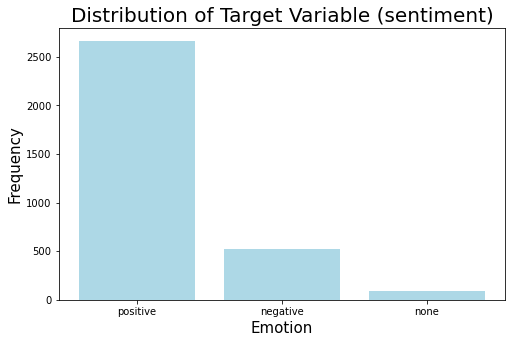

In [15]:
# Import the relevant library
import matplotlib.pyplot as plt

# Define "count" and "target"
count = list(data['sentiment'].loc[data['product']!='unknown'].value_counts().values)
target = list(data['sentiment'].loc[data['product']!='unknown'].value_counts().index)

# Visualize a bar graph
fig, ax = plt.subplots(figsize=(8,5))
plt.bar(target, count, color='lightblue')
ax.set_title('Distribution of Target Variable (sentiment)', fontsize=20)
ax.set_xlabel('Emotion', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

In [16]:
data['sentiment'].loc[data['product']!='unknown'].value_counts(normalize=True)

positive    0.813932
negative    0.158265
none        0.027803
Name: sentiment, dtype: float64

There's an imabalance in our dataset, which we will address in our modeling and sentiment analysis. To account for this, we'll focus on using weighted metrics.

For now, our dataset has been cleaned and preprocessed. The next cell displays the number of rows tha remain (8,914 entries) and the non-null count for each column.

In [17]:
# Call the info() method to confirm that there are no more null entries 
# and to inspect the number of rows that remain
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      8914 non-null   object
 1   product    8914 non-null   object
 2   sentiment  8914 non-null   object
dtypes: object(3)
memory usage: 278.6+ KB


## Tokenizing and Removing Stopwords and Punctuation
For the purpose of our analysis, some parts of each tweet may not be helpful, so they're better off removed. In the next few cells, we perform a process called "tokenizing" to address this issue. We start by applying a tokenizer that removes any Twitter handles (@*username*) that have been mentioned in tweets:

In [18]:
# import TweetTokenizer that filters out twitter handles and string functions
from nltk import TweetTokenizer
import string

# initialize the TweetTokenizer with "strip_handles = True"
tk = TweetTokenizer(strip_handles=True)

# create a new column called "tweet_tokenized" by applying the tokenizer to the "tweet" column
data['tweet_tokenized']=data['tweet'].apply(tk.tokenize)
data

,tweet,product,sentiment,tweet_tokenized
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,..."
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may..."
...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,..."


Using the TweetTokenizer() method, we've stripped the tweets of any handles and split the original tweet into a list of tokens. We'll continue to amend the list of tokens by removing any stop words. Stop words are a set of commonly used words in a language. We remove them because we're trying to identify key, unique words that indicate sentiment. In the next cell, we download a list of English stop words from nltk and use them to process the first list of tokens we generated.

In [19]:
# import nltk and download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# create a list of stopwords, specifying the English language
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keziasetokusumo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# define a function that removes stopwords from a list of tokens
def remove_stopwords(tokens):
    kept = []
    for word in tokens:
        if word not in stopwords_list:
            kept.append(word)
    return kept

# add a new column called "tweet_without_stopwords" by mapping the 
# "remove_stopwords" function onto the "tweet_tokenized" column
data["tweet_without_stopwords"] = data["tweet_tokenized"].apply(remove_stopwords)
data

,tweet,product,sentiment,tweet_tokenized,tweet_without_stopwords
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ...","[., 3g, iphone, ., 3, hrs, tweeting, #rise_aus..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app...","[know, ?, awesome, ipad, /, iphone, app, likel..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,...","[wait, #ipad, 2, also, ., sale, #sxsw, .]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c...","[hope, year's, festival, crashy, year's, iphon..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may...","[great, stuff, fri, #sxsw, :, marissa, mayer, ..."
...,...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, ., #sxsw, {, link, }]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ...","[wave, ,, buzz, ..., rt, interrupt, regularly,..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep...","[google's, zeiger, ,, physician, never, report..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,..."


So far, we've managed to return a list of tokens without Twitter handles and stop words. However, there are still some random punctuation characters such as commas and question marks, as we can see in the first few rows of `tweet_without_stopwords`. Having these characters as tokens don't make sense for analyzing emotions, so we'll write another function to further amend the list by removing punctuation marks.

In [21]:
# define a "punc_stripped" function that takes in a list of tokens
def punc_stripped(twt_tokenized):
    stripped = []
    for item in twt_tokenized:
        if item not in string.punctuation:
            stripped.append(item)
    stripped_2 = []
    for ele in stripped:
        char_stripped = ''
        for char in ele:
            if char not in string.punctuation:
                char_stripped+=char
        stripped_2.append(char_stripped)
    return stripped_2

# apply the "punc_stripped" function to the "tweet_without_stopwords" column
data['tweet_without_stopwords_and_punc'] = data['tweet_without_stopwords'].apply(punc_stripped)
data

,tweet,product,sentiment,tweet_tokenized,tweet_without_stopwords,tweet_without_stopwords_and_punc
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ...","[., 3g, iphone, ., 3, hrs, tweeting, #rise_aus...","[3g, iphone, 3, hrs, tweeting, riseaustin, dea..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app...","[know, ?, awesome, ipad, /, iphone, app, likel...","[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,...","[wait, #ipad, 2, also, ., sale, #sxsw, .]","[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c...","[hope, year's, festival, crashy, year's, iphon...","[hope, years, festival, crashy, years, iphone,..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may...","[great, stuff, fri, #sxsw, :, marissa, mayer, ...","[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, sxsw, link]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ...","[wave, ,, buzz, ..., rt, interrupt, regularly,...","[wave, buzz, , rt, interrupt, regularly, sched..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep...","[google's, zeiger, ,, physician, never, report...","[googles, zeiger, physician, never, reported, ..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphone, customers, complained, time,..."


To recap what we've done so far, we took our original `tweet` column and set everything to lower case. Next, we removed any Twitter handles and returned the results in the `tweet_tokenized` column. We continued to filter the list of tokens by looping through the rows of lists and removing any English stop words, creating another column called `tweet_without_stopwords`. Finally, we looped through the `tweet_without_stopwords` column to remove any punctuation marks in the list of tokens, generating a column called `tweet_without_stopwords_and_punc`.

## Sentiment Analysis
In the next cell, we create a copy of the dataset with `tweet`, `product`, `sentiment`, and `tweet_without_stopwords_and_punc`, which we will use for our sentiment analysis and machine learning model.

In [22]:
# create a new dataframe called "data_tokenized1"
data_tokenized1 = data[['tweet', 'product', 'sentiment', 'tweet_without_stopwords_and_punc']]

# assert that we reduced the number of columns to 4
assert len(data_tokenized1.columns) == 4
data_tokenized1

,tweet,product,sentiment,tweet_without_stopwords_and_punc
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[3g, iphone, 3, hrs, tweeting, riseaustin, dea..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[hope, years, festival, crashy, years, iphone,..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, sxsw, link]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, buzz, , rt, interrupt, regularly, sched..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[googles, zeiger, physician, never, reported, ..."
9091,some verizon iphone customers complained their...,unknown,none,"[verizon, iphone, customers, complained, time,..."


After creating a copy of the dataframe and storing it in "data_tokenized1", we filter for the rows that have been labeled as "positive". Of the remaining rows, we take the tokens in the "tweet_without_stopwords_and_punc" column and pass them into a variable called "positive_tweets_tk". We need to merge all the tokens into one long list, so after creating "positive_tweets_tk" we loop through and combine them into a variable called "positive_tweets_tk_list".

In [23]:
# Find the rows containing positive tweets
positive_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='positive']

# Take the column containing the list of tokens that have been stripped of stopwords and punctuation marks
positive_tweets_tk = positive_tweets_tk['tweet_without_stopwords_and_punc']
positive_tweets_tk

1       [know, awesome, ipad, iphone, app, likely, app...
2                       [wait, ipad, 2, also, sale, sxsw]
4       [great, stuff, fri, sxsw, marissa, mayer, goog...
7       [sxsw, starting, ctia, around, corner, googlei...
8       [beautifully, smart, simple, idea, rt, wrote, ...
                              ...                        
9072    [iphone, 4, cases, rad, ready, stop, tomorrow,...
9077    [pr, guy, convinced, switch, back, iphone, gre...
9079    [papyrus, , sort, like, ipad, nice, lol, sxsw,...
9085    [ive, always, used, camera, iphone, b, c, imag...
9088                       [ipad, everywhere, sxsw, link]
Name: tweet_without_stopwords_and_punc, Length: 2970, dtype: object

In [24]:
# Loop through the list of tokens and combine them into one list
positive_tweets_tk_list = []
for twt in positive_tweets_tk:
    positive_tweets_tk_list += twt
    
# Display the first ten values of the list to make sure we performed the previous step correctly
positive_tweets_tk_list[:10]

['know',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 'theyre']

With all the positive tokens combined into one list, we can use the FreqDist() method to determine the most common words used in tweets with positive sentiment.

In [25]:
# Import FreqDist from nltk library
from nltk import FreqDist

# Instantiate a FreqDist and pass the positive_tweets_tk_list through
fdist_pos = FreqDist(positive_tweets_tk_list)

# Print the top 100 positive words and their counts in a tuple
fdist_pos.most_common(100)

[('sxsw', 3129),
 ('link', 1214),
 ('ipad', 1103),
 ('rt', 935),
 ('apple', 884),
 ('google', 672),
 ('2', 573),
 ('iphone', 549),
 ('store', 543),
 ('', 409),
 ('app', 398),
 ('new', 360),
 ('austin', 290),
 ('popup', 227),
 ('android', 202),
 ('\x89', 188),
 ('launch', 160),
 ('get', 158),
 ('great', 136),
 ('party', 134),
 ('via', 132),
 ('line', 131),
 ('ipad2', 131),
 ('time', 127),
 ('free', 125),
 ('social', 124),
 ('circles', 122),
 ('cool', 120),
 ('im', 117),
 ('like', 114),
 ('one', 111),
 ('today', 111),
 ('day', 109),
 ('maps', 107),
 ('w', 104),
 ('mobile', 100),
 ('sxswi', 97),
 ('awesome', 94),
 ('good', 92),
 ('love', 92),
 ('go', 92),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('network', 88),
 ('apps', 83),
 ('people', 82),
 ('got', 81),
 ('check', 77),
 ('û', 74),
 ('thanks', 73),
 ('see', 73),
 ('even', 70),
 ('going', 67),
 ('open', 67),
 ('mayer', 64),
 ('first', 64),
 ('called', 64),
 ('best', 62),
 ('around', 61),
 ('next', 61),
 ('ûï', 60),
 ('m

At first glance, we can see that the most common words associated with positive tweets have "sxsw". By inspecting several tweets that contain "sxsw", we can infer that "sxsw" refers to a festival. Since all the tweets are from members of the crowd who attended the festival, we can amend the original list of stop words to include strings with "sxsw". Aside from "sxsw", there are other strings such as "rt" and "link" which don't prove useful. The string "rt" refers to a retweet, and the string "link" is used to indicate the presence of a URL. Recall that during our preprocessing and cleaning stage, we used regex to locate and remove any URLs in tweets. Hence, it would make sense to also remove any indiciation of URLs by adding "link" to our list of stop words.

In the following cell, we create a list called "sxsw_words" to add to "stopwords_list". We also add "rt", "link", and any other ambiguous characters we've seen in the FreqDist() output.

In [26]:
# Create an empty list to store sxsw related strings
sxsw_words = []

# Loop through the column and filter for strings that contain "sxsw"
for twt_tkn in data_tokenized1['tweet_without_stopwords_and_punc']:
    sxsw_words += twt_tkn
sxsw_words = [x for x in sxsw_words if 'sxsw' in x]

# Add to "stopwords_list"
stopwords_list += sxsw_words
stopwords_list += ['rt', 'link','\x9d', 'û', '÷','\x89', 'ûï', '''''']

In [27]:
# Remove stop words from "positive_tweets_tk_list" using the updated list
positive_tweets_tk_list = remove_stopwords(positive_tweets_tk_list)

# Instantiate another FreqDist with the updated list
fdist_pos = FreqDist(positive_tweets_tk_list)

# Display the new set of most common words in positive tweets
fdist_pos.most_common(100)

[('ipad', 1103),
 ('apple', 884),
 ('google', 672),
 ('2', 573),
 ('iphone', 549),
 ('store', 543),
 ('app', 398),
 ('new', 360),
 ('austin', 290),
 ('popup', 227),
 ('android', 202),
 ('launch', 160),
 ('get', 158),
 ('great', 136),
 ('party', 134),
 ('via', 132),
 ('line', 131),
 ('ipad2', 131),
 ('time', 127),
 ('free', 125),
 ('social', 124),
 ('circles', 122),
 ('cool', 120),
 ('im', 117),
 ('like', 114),
 ('one', 111),
 ('today', 111),
 ('day', 109),
 ('maps', 107),
 ('w', 104),
 ('mobile', 100),
 ('awesome', 94),
 ('good', 92),
 ('love', 92),
 ('go', 92),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('network', 88),
 ('apps', 83),
 ('people', 82),
 ('got', 81),
 ('check', 77),
 ('thanks', 73),
 ('see', 73),
 ('even', 70),
 ('going', 67),
 ('open', 67),
 ('mayer', 64),
 ('first', 64),
 ('called', 64),
 ('best', 62),
 ('around', 61),
 ('next', 61),
 ('marissa', 59),
 ('major', 59),
 ('pop', 59),
 ('need', 58),
 ('wins', 58),
 ('want', 58),
 ('video', 57),
 ('win', 56)

The results of the FreqDist() method appear to be less ambiguous this time around, because we've removed the unnecessary words with our stop words list. We'll repeat the process with negative and no sentiment tweets in the cells below.

In [28]:
# Filter for negative sentiment tweets and create a list called "neg_tweets_tk_list"
neg_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='negative']
neg_tweets_tk = neg_tweets_tk['tweet_without_stopwords_and_punc']
neg_tweets_tk_list = []
for twt in neg_tweets_tk:
    neg_tweets_tk_list += twt
neg_tweets_tk_list = remove_stopwords(neg_tweets_tk_list)

# Pass "neg_tweets_tk_list" into the FreqDist() method and display the most common 100 words
fdist_neg = FreqDist(neg_tweets_tk_list)
fdist_neg.most_common(100)

[('ipad', 198),
 ('iphone', 157),
 ('google', 149),
 ('apple', 115),
 ('2', 77),
 ('app', 60),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('design', 29),
 ('people', 29),
 ('need', 25),
 ('austin', 24),
 ('get', 24),
 ('android', 23),
 ('launch', 22),
 ('one', 22),
 ('today', 21),
 ('would', 19),
 ('news', 18),
 ('time', 18),
 ('think', 18),
 ('headaches', 17),
 ('go', 17),
 ('long', 17),
 ('fail', 17),
 ('line', 16),
 ('says', 16),
 ('ive', 16),
 ('im', 16),
 ('day', 16),
 ('network', 16),
 ('battery', 15),
 ('cant', 15),
 ('popup', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('america', 15),
 ('users', 14),
 ('money', 14),
 ('major', 14),
 ('really', 14),
 ('via', 14),
 ('fascist', 14),
 ('company', 14),
 ('going', 13),
 ('back', 13),
 ('called', 13),
 ('phone', 13),
 ('way', 13),
 ('many', 12),
 ('already', 12),
 ('1', 12),
 ('wait', 12),
 ('fast', 12),
 ('thing', 12),
 ('w', 12),
 ('tapworthy', 12),
 ('talk', 12),
 ('take',

In [29]:
# Filter for no sentiment tweets and create a list called "none_tweets_tk_list"
none_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='none']
none_tweets_tk = none_tweets_tk['tweet_without_stopwords_and_punc']
none_tweets_tk_list = []
for twt in none_tweets_tk:
    none_tweets_tk_list += twt
none_tweets_tk_list = remove_stopwords(none_tweets_tk_list)

# Pass "none_tweets_tk_list" into the FreqDist() method and display the most common 100 words
fdist_none = FreqDist(none_tweets_tk_list)
fdist_none.most_common(100)

[('google', 1577),
 ('ipad', 1327),
 ('apple', 1187),
 ('store', 868),
 ('iphone', 836),
 ('new', 671),
 ('2', 655),
 ('austin', 625),
 ('circles', 493),
 ('social', 475),
 ('launch', 458),
 ('today', 428),
 ('popup', 378),
 ('android', 358),
 ('app', 355),
 ('network', 348),
 ('via', 282),
 ('called', 270),
 ('free', 260),
 ('line', 248),
 ('mobile', 228),
 ('major', 223),
 ('party', 210),
 ('get', 209),
 ('possibly', 184),
 ('temporary', 168),
 ('opening', 165),
 ('ipad2', 162),
 ('w', 144),
 ('one', 138),
 ('downtown', 136),
 ('check', 135),
 ('open', 135),
 ('going', 133),
 ('see', 132),
 ('like', 127),
 ('know', 126),
 ('googles', 124),
 ('time', 124),
 ('mayer', 124),
 ('im', 123),
 ('marissa', 122),
 ('need', 117),
 ('people', 112),
 ('apps', 111),
 ('music', 111),
 ('win', 111),
 ('come', 111),
 ('day', 104),
 ('us', 103),
 ('maps', 103),
 ('pop', 99),
 ('make', 95),
 ('launching', 95),
 ('panel', 94),
 ('news', 93),
 ('go', 93),
 ('anyone', 92),
 ('first', 91),
 ('tech', 91),


Now that we have a better idea of what the results from a FreqDist() output look like, we can visualize the data to get a sense of positive, negative, and no sentiment tweets. In the following cells, we zip the lists to treat the token of words as the x-axis and their corresponding count numbers as the y-axis. We'll visualize the top 20.

In [30]:
# Use the list() and zip() method to store the 20 most common words and their frequencies
fdist_pos20 = list(zip(*fdist_pos.most_common(20)))
fdist_neg20 = list(zip(*fdist_neg.most_common(20)))
fdist_none20 = list(zip(*fdist_none.most_common(20)))

In [31]:
# Define a function to plot the frequency distributions
def plot_fdist(fdist, title=None, color='blue'):
    y_axis = fdist[1]
    x_axis = fdist[0]
    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(x_axis, y_axis, color=color)
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel('Tokenized Words')

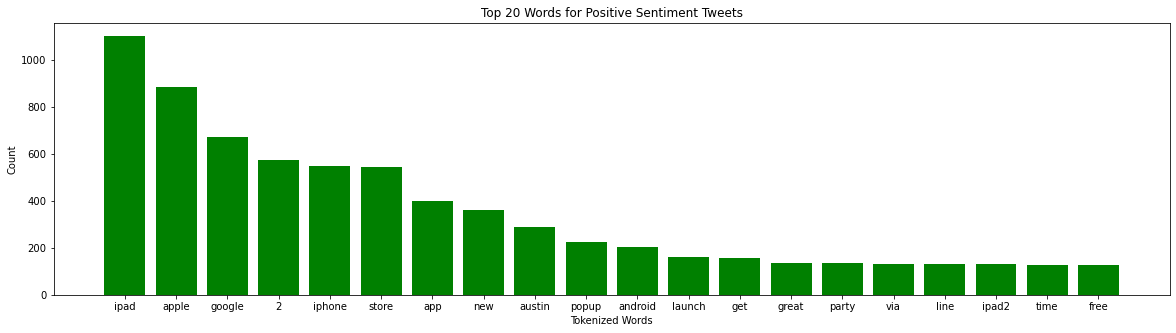

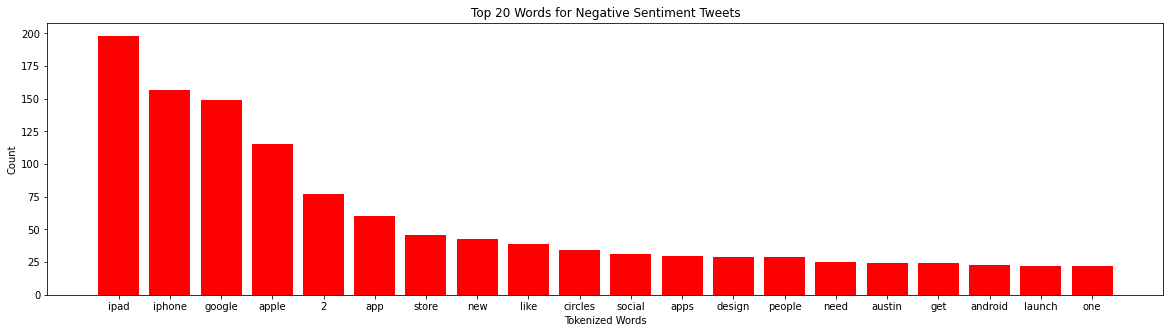

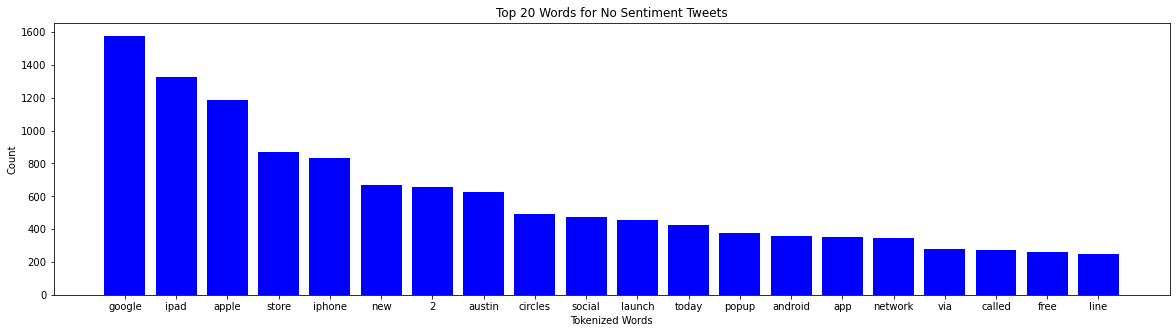

In [32]:
# Use the function we created in the previous cell to plot the frequency distributions
plot_fdist(fdist_pos20, 'Top 20 Words for Positive Sentiment Tweets', 'green')
plot_fdist(fdist_neg20, 'Top 20 Words for Negative Sentiment Tweets', 'red')
plot_fdist(fdist_none20, 'Top 20 Words for No Sentiment Tweets', 'blue')

Looking at the three visualizations, it seems like a lot of the words overlap. For instance, "ipad", "google", and "apple" all appear to be the top three words associated with each type of sentiment. Knowing this, we can consider repeating our visualizations, but with bigrams instead. Bigrams refer to a pair of words that occur consecutively, which will help us better understand what the positive, negative, and no sentiment tweets are generally about.

In the next few cells, we use the BigramAssocMeasures() method to return the top 10 highly collocated words for each type of emotion.

In [33]:
# Import library
from nltk.collocations import *

# Instantiate a BigramAssocMeasures()
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Find and score the top 10 collocations
pos_finder = BigramCollocationFinder.from_words(positive_tweets_tk_list)
score_pos = pos_finder.score_ngrams(bigram_measures.raw_freq)
score_pos[:10]

[(('ipad', '2'), 0.017203564084989718),
 (('apple', 'store'), 0.007402330363262509),
 (('iphone', 'app'), 0.0047292666209732695),
 (('popup', 'store'), 0.004420836189170664),
 (('social', 'network'), 0.0028786840301576423),
 (('google', 'maps'), 0.002775873886223441),
 (('new', 'social'), 0.002638793694311172),
 (('downtown', 'austin'), 0.002467443454420836),
 (('ipad', 'app'), 0.002433173406442769),
 (('apple', 'opening'), 0.002398903358464702)]

In [34]:
# Find and score the top 10 collocations
neg_finder = BigramCollocationFinder.from_words(neg_tweets_tk_list)
score_neg = neg_finder.score_ngrams(bigram_measures.raw_freq)
score_neg[:10]

[(('ipad', '2'), 0.01072478809894482),
 (('apple', 'store'), 0.0041515308770108976),
 (('iphone', 'app'), 0.0041515308770108976),
 (('ipad', 'design'), 0.0034596090641757483),
 (('design', 'headaches'), 0.002940667704549386),
 (('new', 'social'), 0.0027676872513405985),
 (('google', 'circles'), 0.002594706798131811),
 (('social', 'network'), 0.002594706798131811),
 (('company', 'america'), 0.002248745891714236),
 (('news', 'apps'), 0.002248745891714236)]

In [35]:
# Find and score the top 10 collocations
none_finder = BigramCollocationFinder.from_words(none_tweets_tk_list)
score_none = none_finder.score_ngrams(bigram_measures.raw_freq)
score_none[:10]

[(('ipad', '2'), 0.010760359074965817),
 (('social', 'network'), 0.006757426233081664),
 (('apple', 'store'), 0.006658343736995423),
 (('new', 'social'), 0.006182747755781464),
 (('called', 'circles'), 0.004914491805877574),
 (('network', 'called'), 0.004855042308225829),
 (('google', 'launch'), 0.004716326813705091),
 (('major', 'new'), 0.004359629827794622),
 (('launch', 'major'), 0.004201097834056635),
 (('popup', 'store'), 0.003943483344232408)]

In [36]:
# Use the zip() method and specify x and y values for each sentiment
score_pos10 = list(zip(*score_pos[:10]))
score_neg10 = list(zip(*score_neg[:10]))
score_none10 = list(zip(*score_none[:10]))
score_pos10_x = [str(item) for item in list(score_pos10[0])]
score_pos10_y = list(score_pos10[1])
score_neg10_x = [str(item) for item in list(score_neg10[0])]
score_neg10_y = list(score_neg10[1])
score_none10_x = [str(item) for item in list(score_none10[0])]
score_none10_y = list(score_none10[1])

In [37]:
# Create a function to plot bigrams
def plot_bigram(x, y, sentiment='n/a', color='blue'):
    fig, ax = plt.subplots(figsize=(40,10))
    ax.bar(x, y, color=color)
    ax.set_xticklabels(x, fontsize=20)
    ax.set_title(f'Top 10 Two-Word Combos for {sentiment} Sentiment Tweets', fontsize=35)
    plt.show()

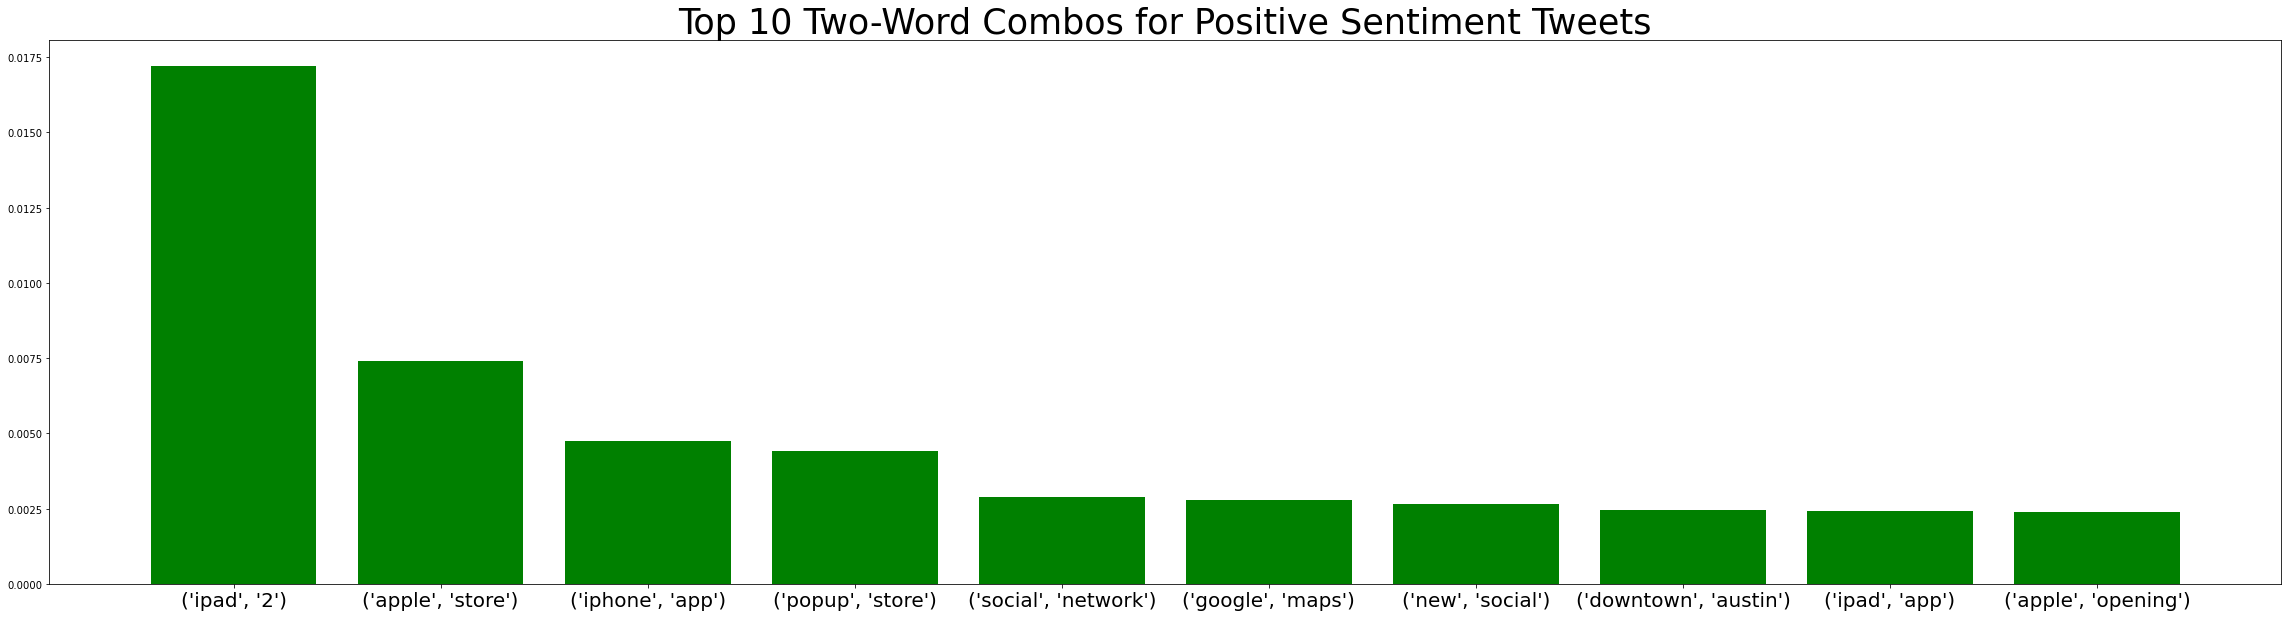

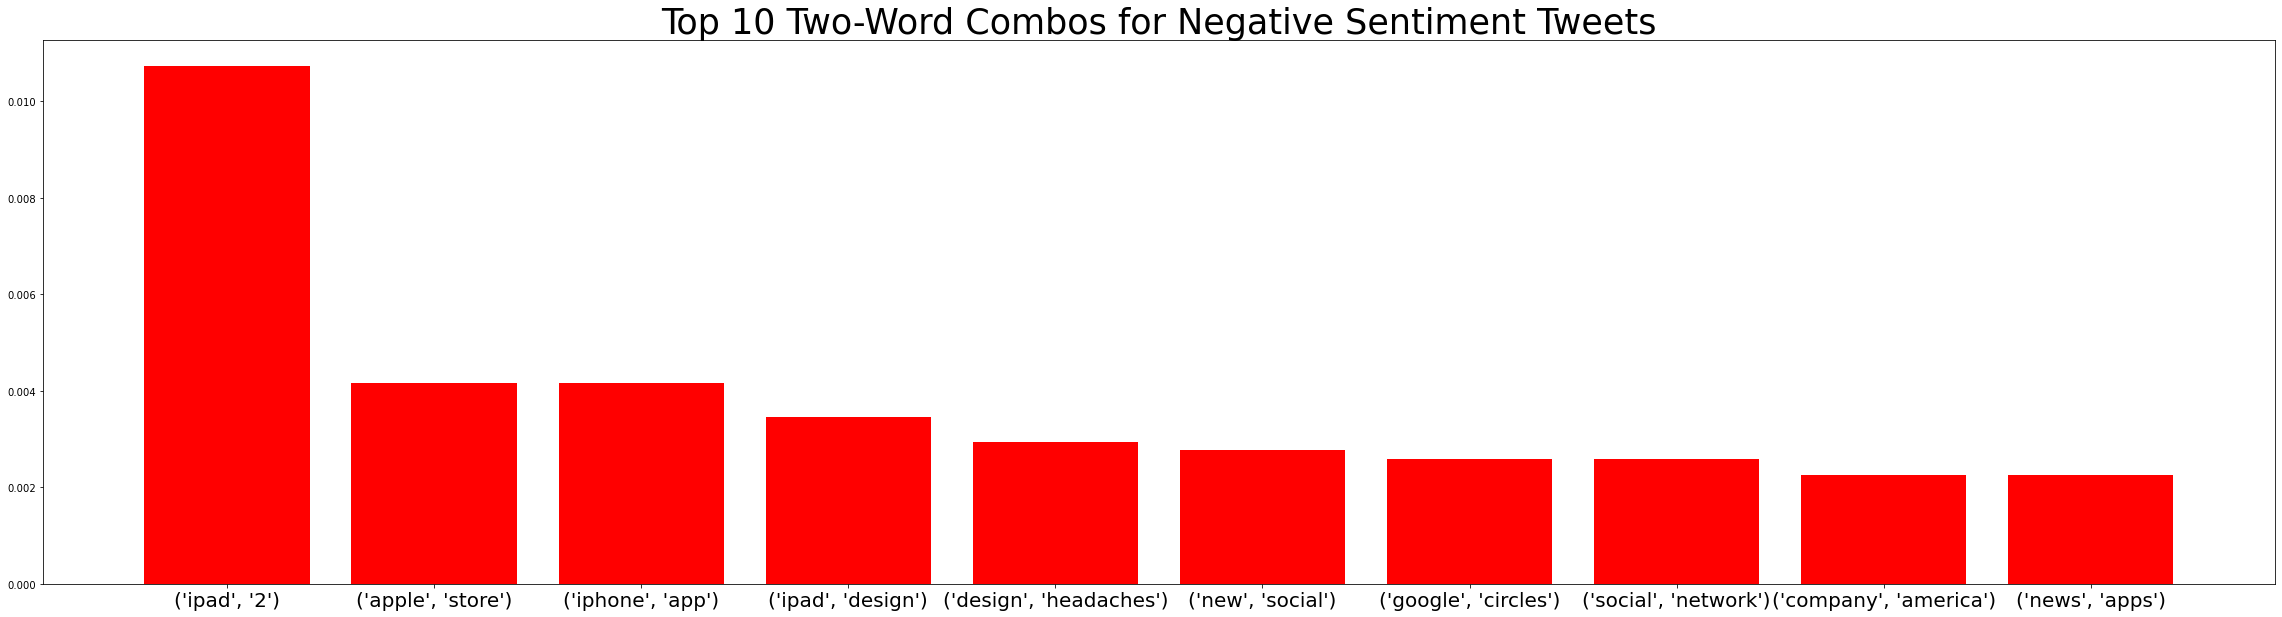

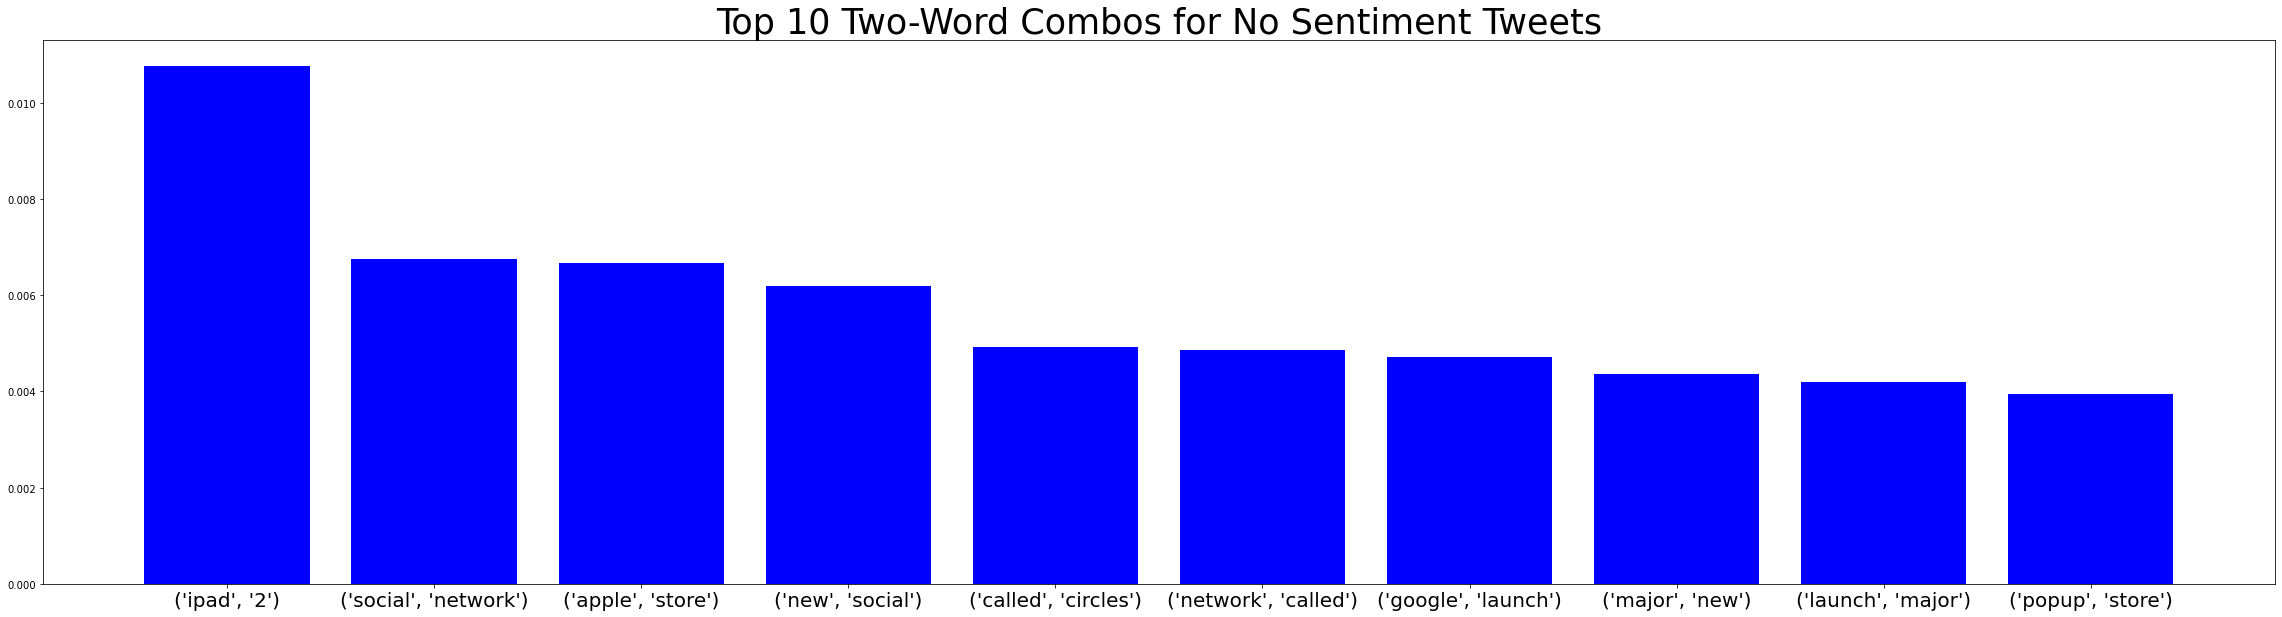

In [38]:
# Visualize the top 10 bigrams for each type of sentiment
plot_bigram(score_pos10_x, score_pos10_y, sentiment='Positive', color='green')
plot_bigram(score_neg10_x, score_neg10_y, sentiment='Negative', color='red')
plot_bigram(score_none10_x, score_none10_y, sentiment='No', color='blue')

We have a slightly better idea of what contributors thought was positive, negative, and neutral. Looking at the visualization of bigrams in positive tweets, it seems that the popup store and apps like google maps garner positive attention. When it comes to negative tweets, it appears that there's some criticism surrounding the ipad's design and the google circles app. Neutral tweets appear to be objective statements as ("called", "circles") and ("network", "called") are bigrams that are highly collocated, indicating that such tweets are stating the names of new apps or products.

Knowing which brand the contributor is talking about might still be ambiguous, even with bigrams. Hence, we'll continue by separating tweets into positive and negative tweets related to each company.

## Sentiment Analysis by Brand
We repeat the process from the previous section by creating copies of the data and using functions for efficiency.

In [39]:
# Create copies of the dataframe to filter for tweets about Google, Android, and Apple
data_tokenized1["tweet_without_stopwords_and_punc"] = data_tokenized1["tweet_without_stopwords_and_punc"].apply(remove_stopwords)
google_tweets = data_tokenized1.loc[(data_tokenized1['product']=='Google') | (data_tokenized1['product']=='Other Google product or service')]
android_tweets = data_tokenized1.loc[(data_tokenized1['product']=='Android') | (data_tokenized1['product']=='Android App')]
apple_tweets = data_tokenized1.loc[(data_tokenized1['product']=='iPad') | (data_tokenized1['product']=='iPhone') | (data_tokenized1['product']=='iPad or iPhone App') | (data_tokenized1['product']=='Other Apple product or service') | (data_tokenized1['product']=='Apple')]

In [40]:
# Create a function called twt_list to convert the column of tokens for each company into a single, iterable object
def twt_list(df, sentiment):
    company_twt = df.loc[df['sentiment']==sentiment]
    company_twt = company_twt['tweet_without_stopwords_and_punc']
    company_list = []
    for twt in company_twt:
        company_list+=twt
    return company_list

In [41]:
# Filter for positive and negative tweets for each company
pos_google_twt_list = twt_list(google_tweets, 'positive')
neg_google_twt_list = twt_list(google_tweets, 'negative')
pos_android_twt_list = twt_list(android_tweets, 'positive')
neg_android_twt_list = twt_list(android_tweets, 'negative')
pos_apl_twt_list = twt_list(apple_tweets, 'positive')
neg_apl_twt_list = twt_list(apple_tweets, 'negative')

To supplement our graphs, we'll create a word cloud to visualize key texts for each sentiment and company. This will aid our qualitative evaluation of what each company does well and what they can improve on.

In the next few cells, we use the WordCloud library and pass the list of tokens we defined.

In [42]:
# Import the library for visualizing the tokens as a WordCloud
from wordcloud import WordCloud

# Define a function called "wordcloud" that takes in a list of tokens
def wordcloud(tokens, background_color='black', text_color='Blues', title=''):
    wordcloud = WordCloud(background_color=background_color, 
                          colormap=text_color, 
                          width=500, height=300)
    wordcloud.generate(','.join(tokens))
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

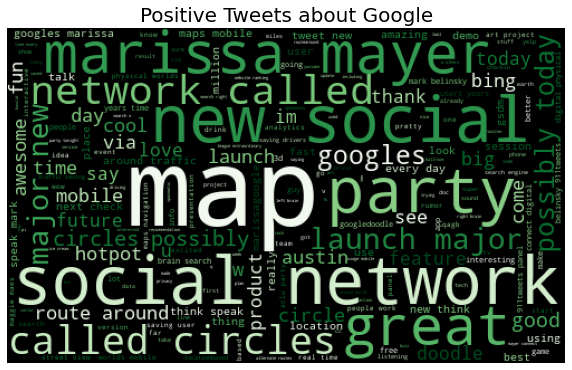

In [43]:
# Generate a wordcloud of positive tweets related to Google
pos_google_wordcloud_list = [item for item in pos_google_twt_list if item!='google']
wordcloud(pos_google_wordcloud_list, text_color='Greens', title="Positive Tweets about Google")

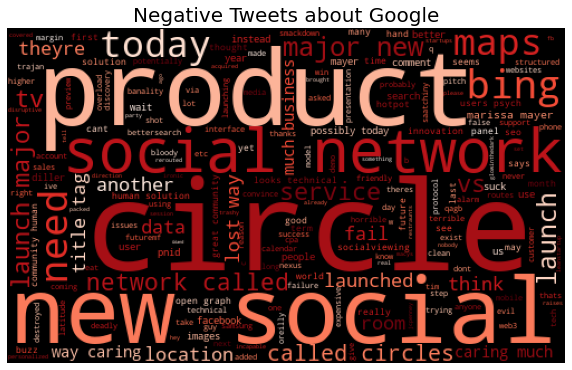

In [44]:
# Generate a wordcloud of negative tweets related to Google
neg_google_wordcloud_list = [item for item in neg_google_twt_list if item!='google']
wordcloud(neg_google_wordcloud_list, text_color='Reds', title='Negative Tweets about Google')

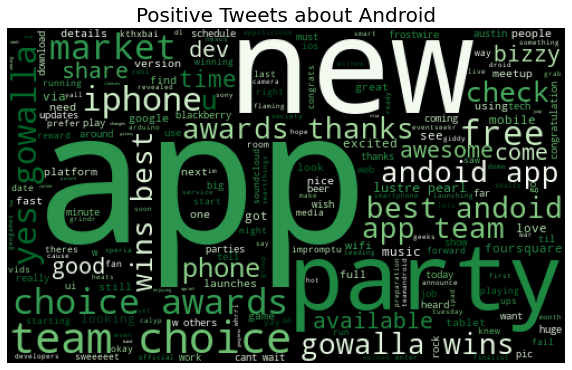

In [45]:
# Generate a wordcloud of positive tweets related to Android
pos_android_wordcloud_list = [item for item in pos_android_twt_list if item!='android']
wordcloud(pos_android_wordcloud_list, text_color='Greens', title='Positive Tweets about Android')

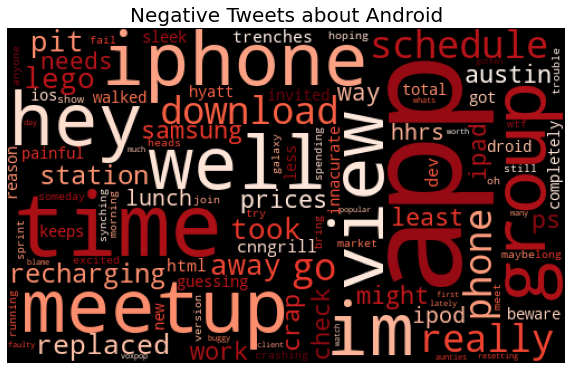

In [46]:
# Generate a wordcloud of negative tweets related to Android
neg_android_wordcloud_list = [item for item in neg_android_twt_list if item!='android']
wordcloud(neg_android_wordcloud_list, text_color='Reds', title='Negative Tweets about Android')

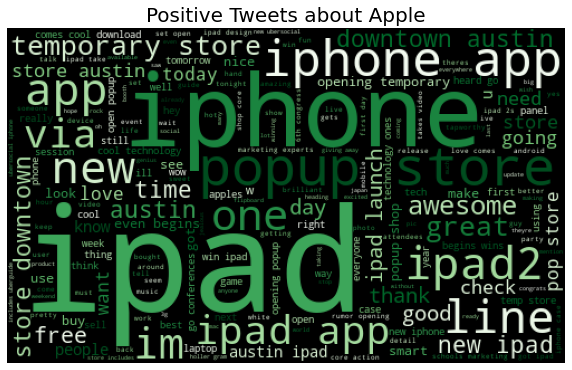

In [47]:
# Generate a wordcloud of positive tweets related to Apple
pos_apl_wordcloud_list = [item for item in pos_apl_twt_list if item!='apple']
wordcloud(pos_apl_wordcloud_list, text_color='Greens', title='Positive Tweets about Apple')

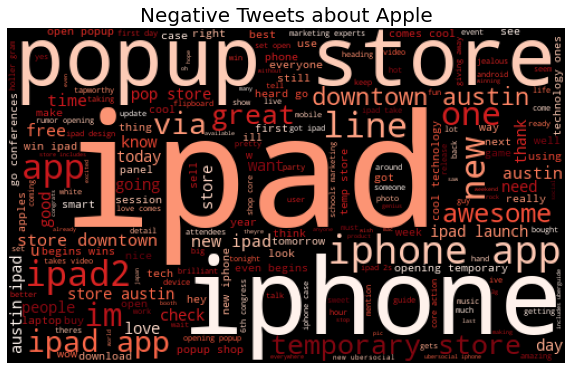

In [48]:
# Generate a wordcloud of negative tweets related to Apple
neg_apl_wordcloud_list = [item for item in pos_apl_twt_list if item!='apple']
wordcloud(neg_apl_wordcloud_list, text_color='Reds', title='Negative Tweets about Apple')

Now that we've generated word clouds, we'll go ahead and define several functions to plot the top collocations for positive and negative tweets per brand.

In [49]:
# Define a function called "score_bigram" that returns the top 10 collocations
def score_bigram(token_list):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(token_list)
    score = finder.score_ngrams(bigram_measures.raw_freq)
    score_10 = list(zip(*score[:10]))
    return score_10

In [50]:
# Use "score_bigram" on the positive and negative tweets for each brand
google_score_pos = score_bigram(pos_google_twt_list)
google_score_neg = score_bigram(neg_google_twt_list)
android_score_pos = score_bigram(pos_android_twt_list)
android_score_neg = score_bigram(neg_android_twt_list)
apl_score_pos = score_bigram(pos_apl_twt_list)
apl_score_neg = score_bigram(neg_apl_twt_list)

In [51]:
# Define a function called "plot_bigram_company" that takes in a list of tokens and the name of the company
def plot_bigram_company(tokens, company = '', sentiment='n/a', color='blue'):
    fig, ax = plt.subplots(figsize=(45,10))
    x = [str(item) for item in list(tokens[0])]
    y = list(tokens[1])
    ax.bar(x, y, color=color)
    ax.set_xticklabels(x, fontsize=20)
    ax.set_title(f'Top 10 Two-Word Combos for {sentiment} Sentiment Tweets about {company}', fontsize=35)
    plt.show()

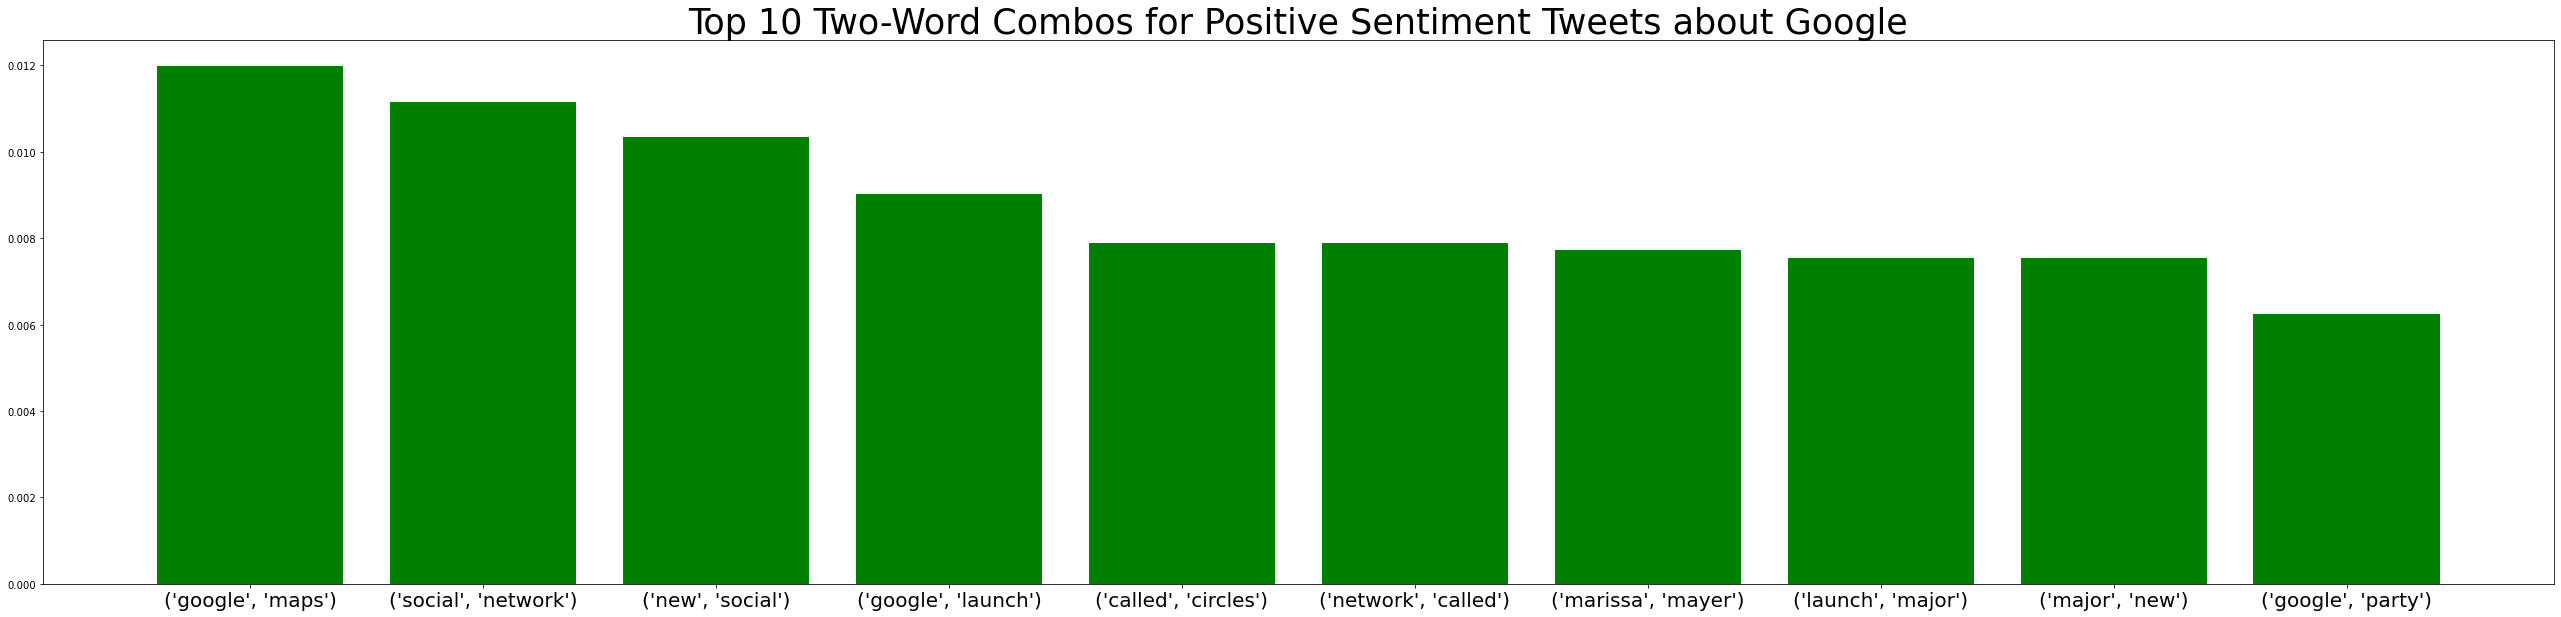

In [52]:
# Plot the top 10 bigrams for positive Google tweets
plot_bigram_company(google_score_pos, company='Google', sentiment='Positive', color='green')

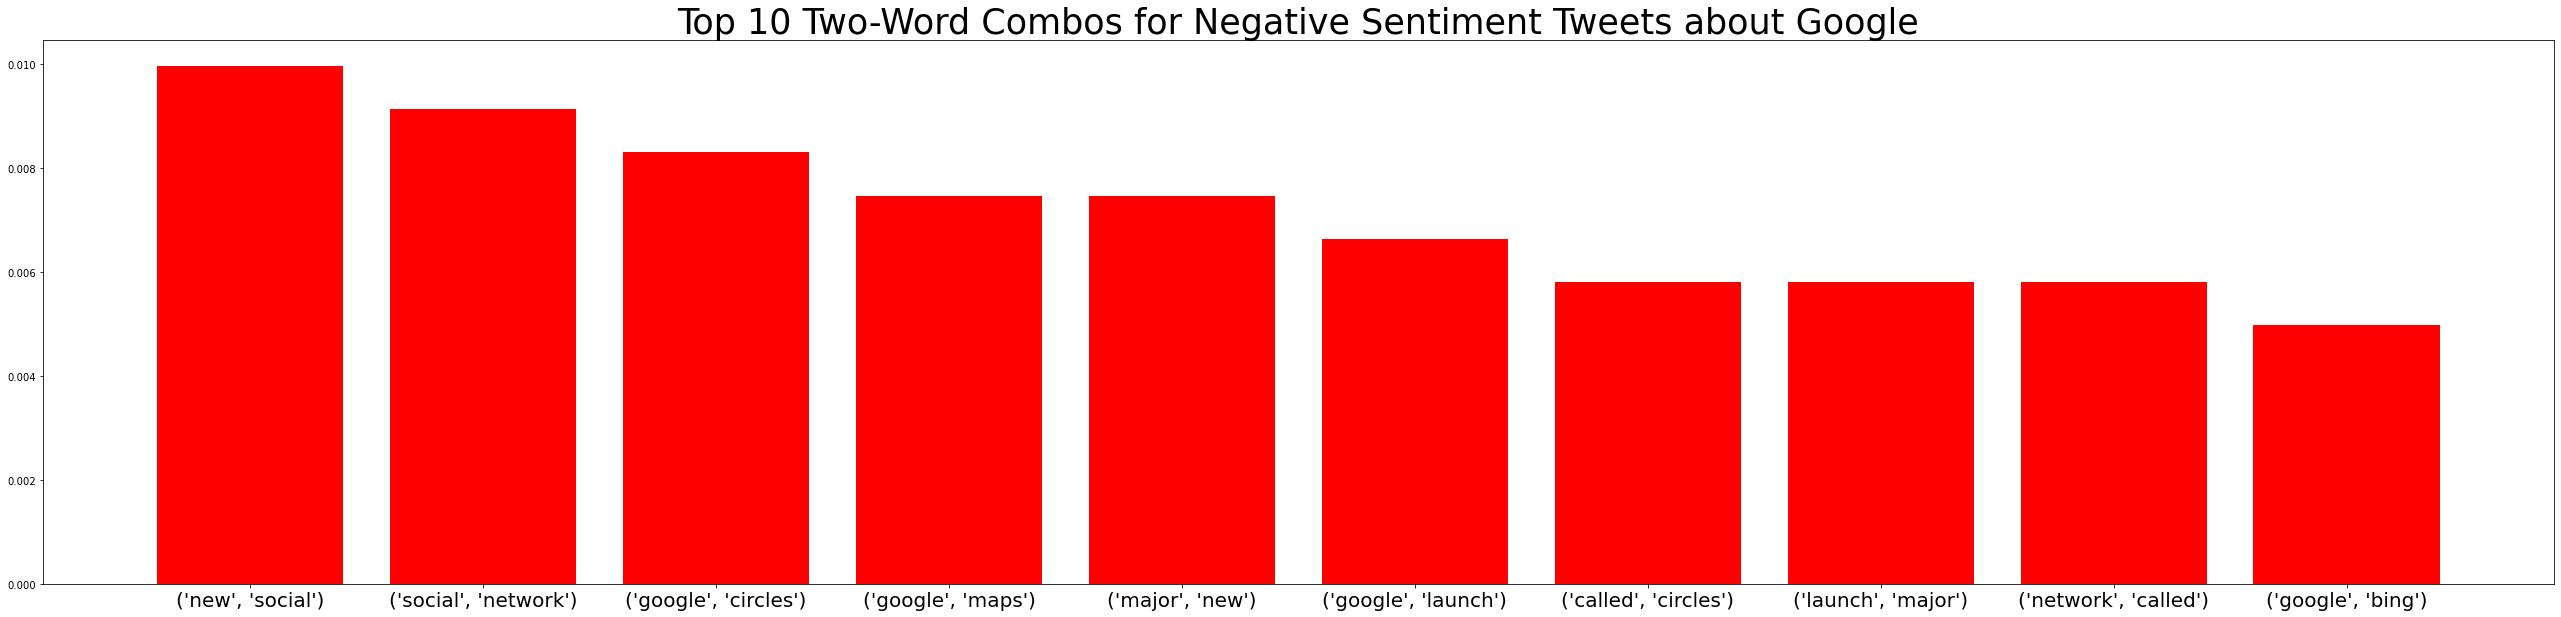

In [53]:
# Plot the top 10 bigrams for negative Google tweets
plot_bigram_company(google_score_neg, company='Google', sentiment='Negative', color='red')

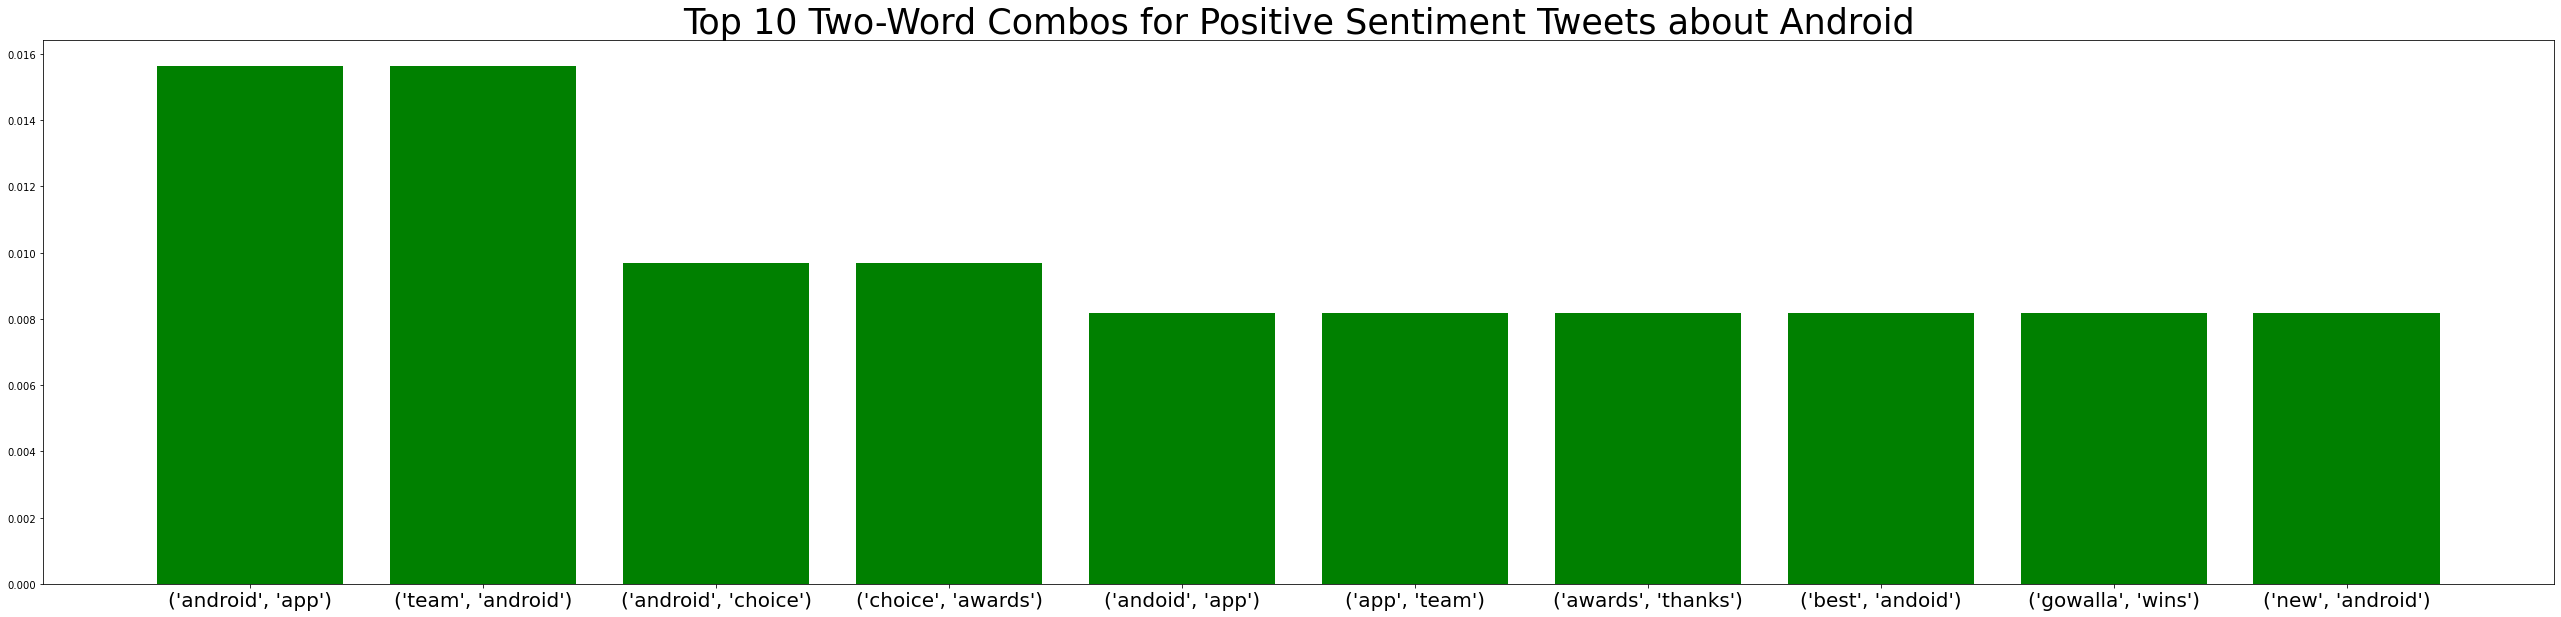

In [54]:
# Plot the top 10 bigrams for positive Android tweets
plot_bigram_company(android_score_pos, company='Android', sentiment='Positive', color='green')

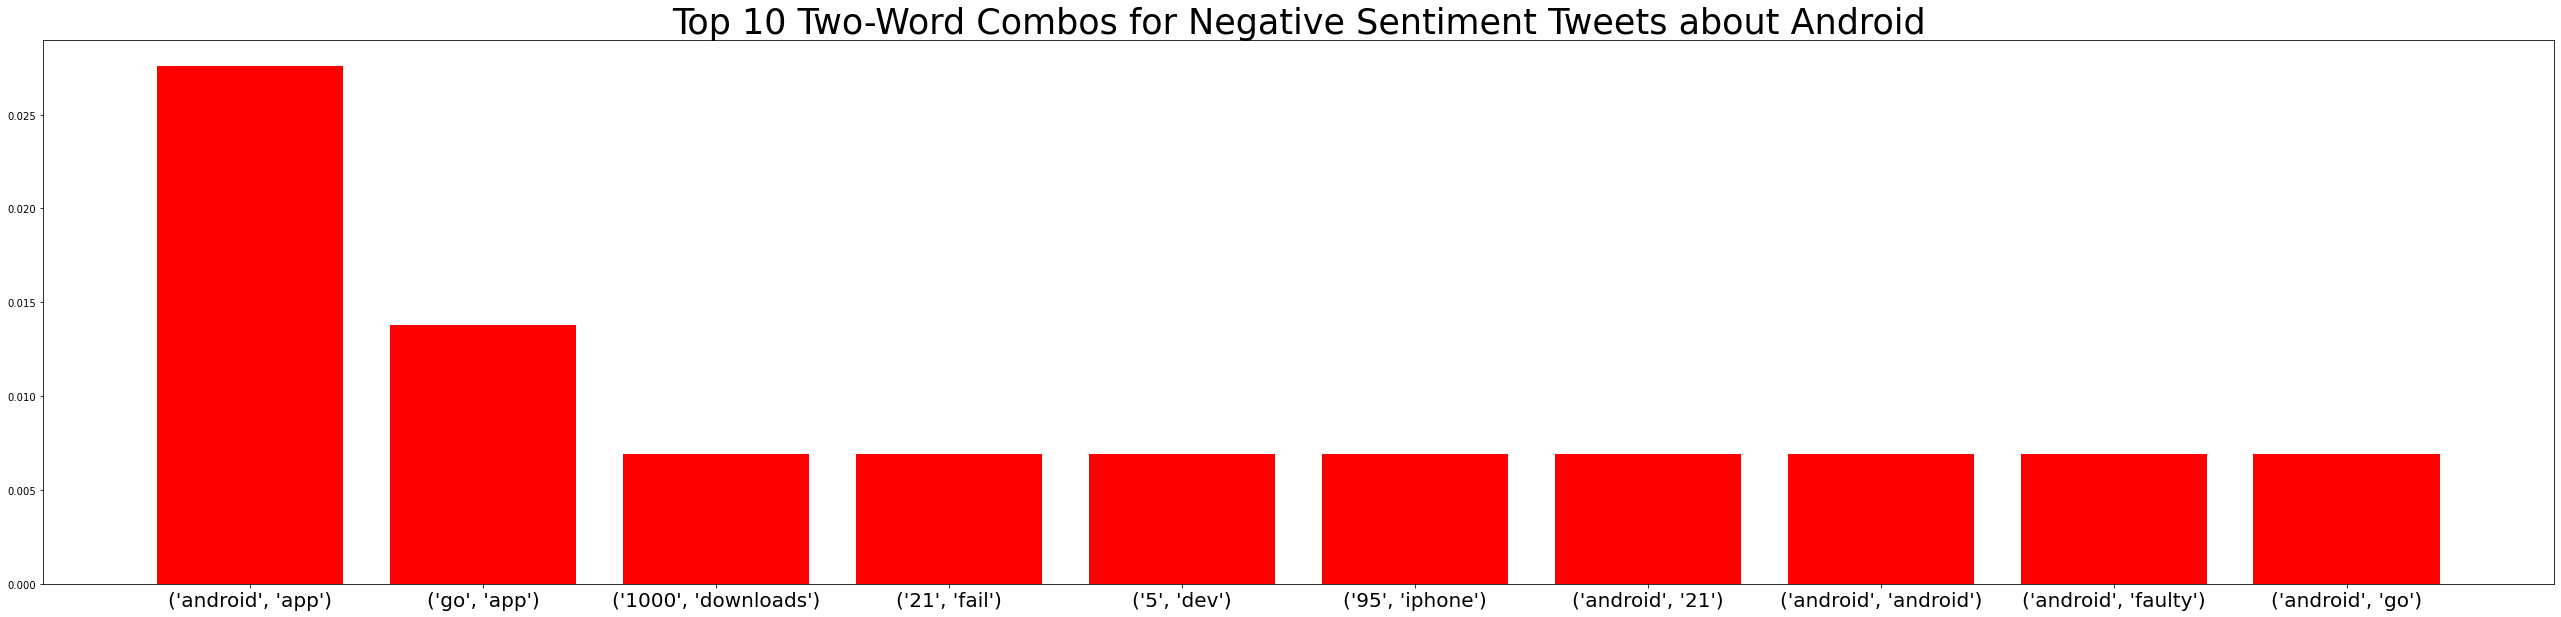

In [55]:
# Plot the top 10 bigrams for negative Android tweets
plot_bigram_company(android_score_neg, company='Android', sentiment='Negative', color='red')

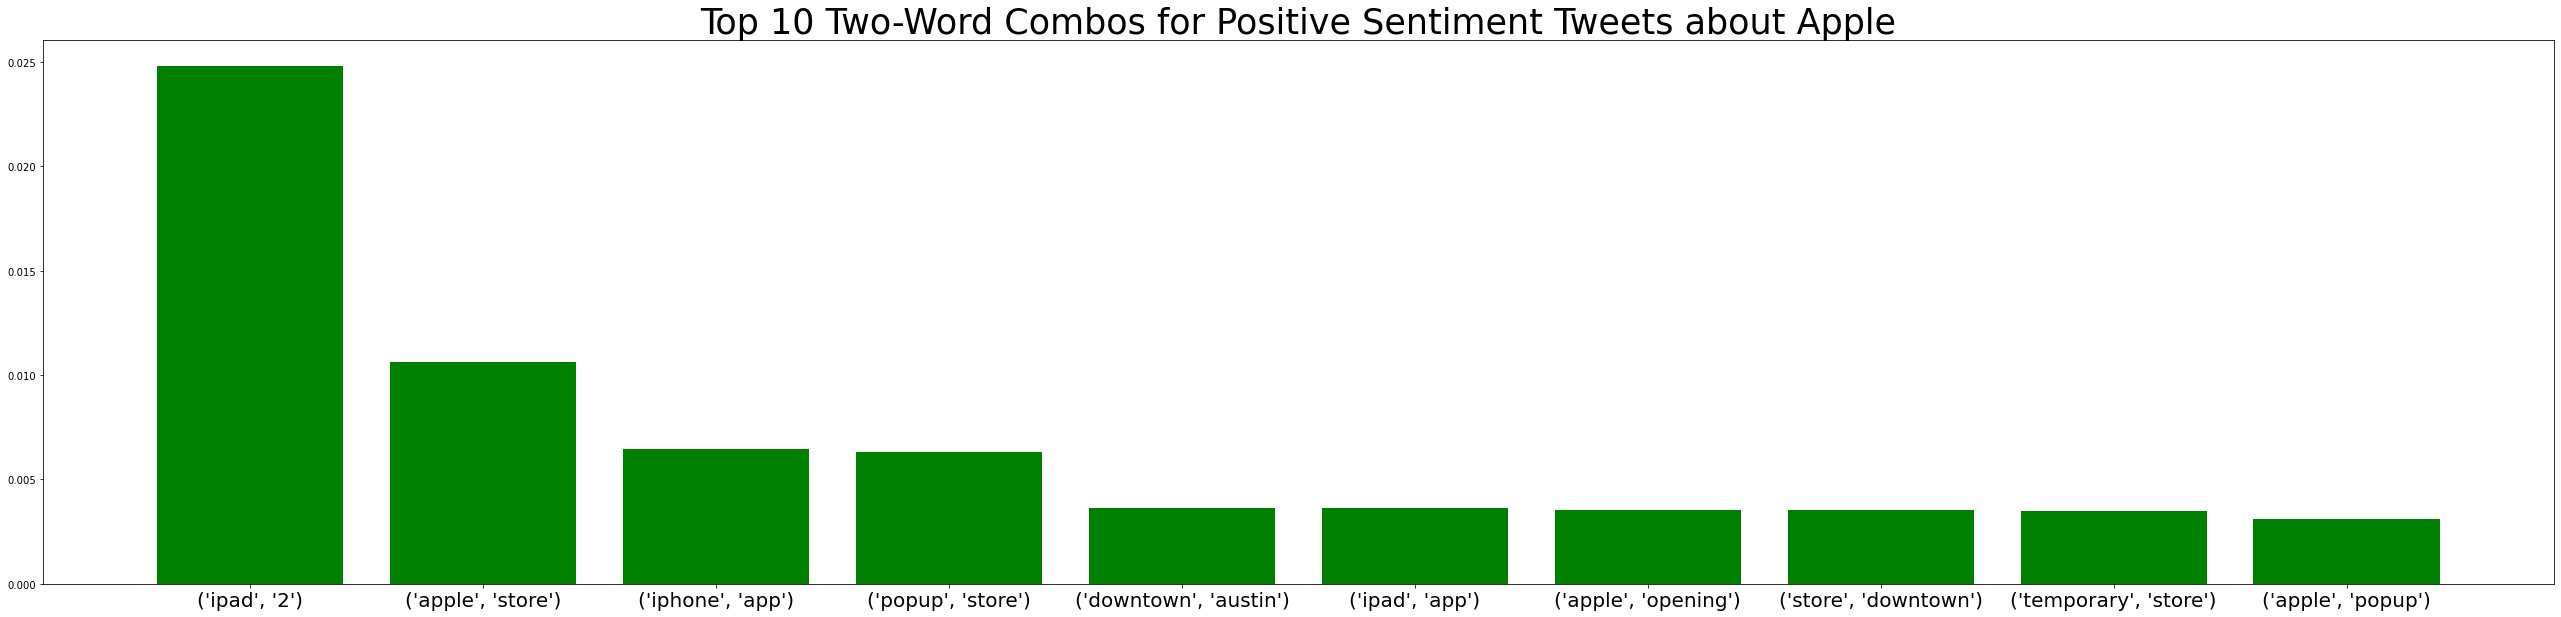

In [56]:
# Plot the top 10 bigrams for positive Apple tweets
plot_bigram_company(apl_score_pos, company='Apple', sentiment='Positive', color='green')

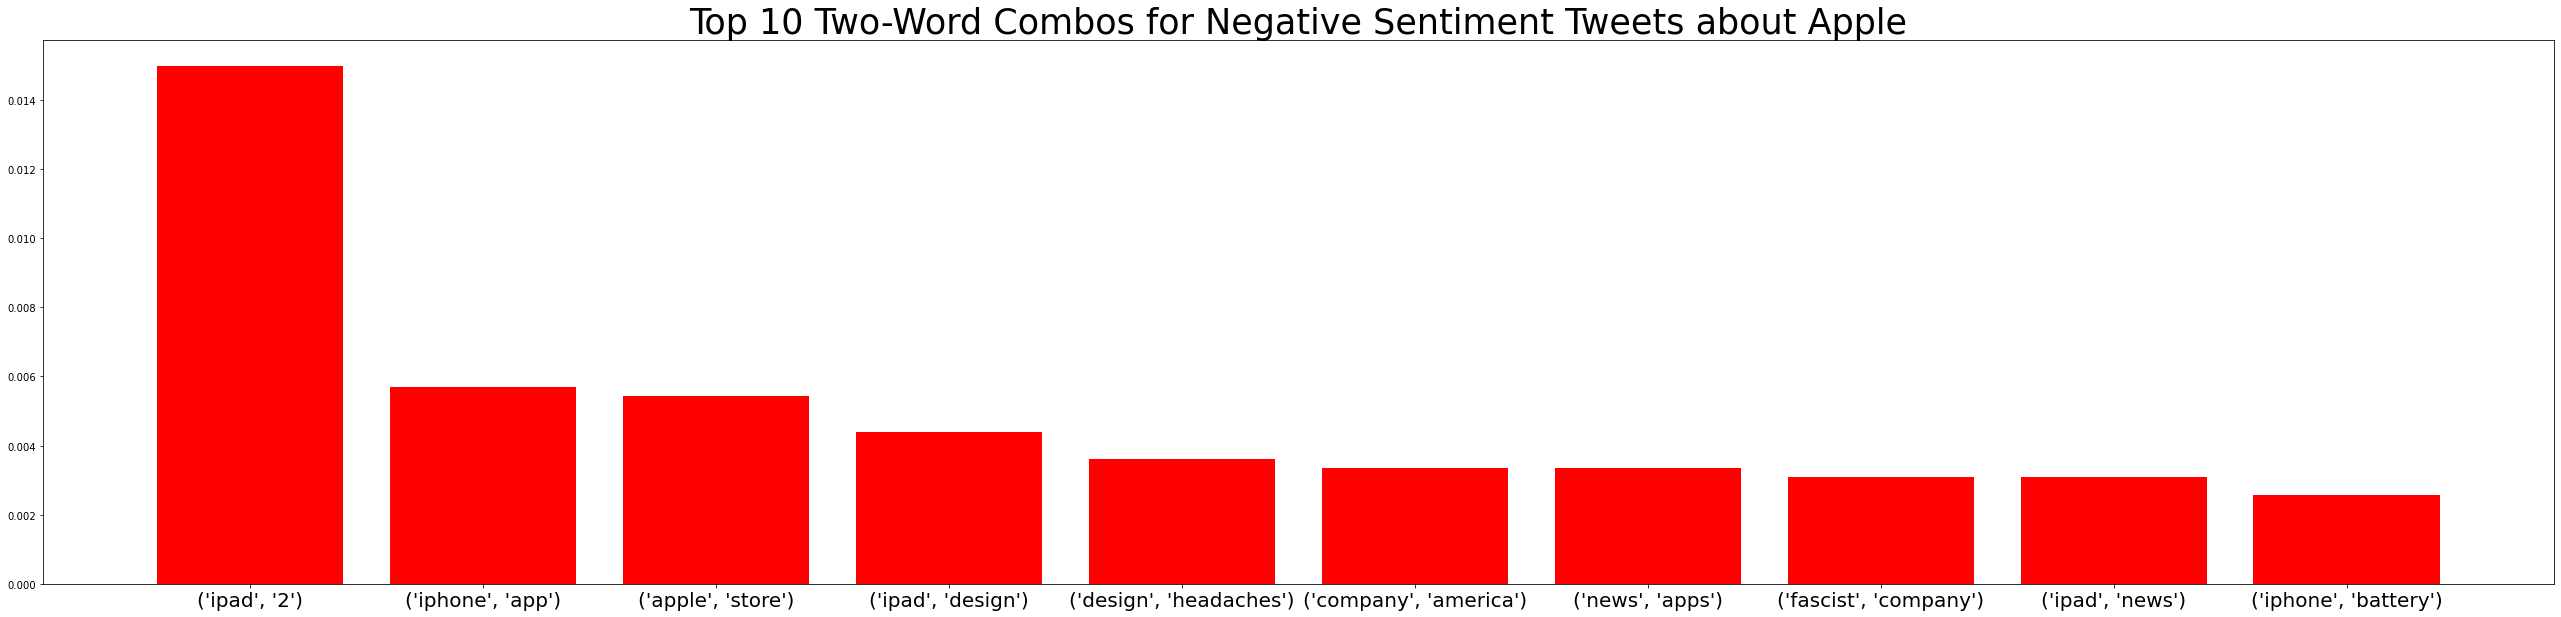

In [57]:
# Plot the top 10 bigrams for negative Apple tweets
plot_bigram_company(apl_score_neg, company='Apple', sentiment='Negative', color='red')

To get a better sense of overall attitudes towards the products, we can plot the positive, negative, and neutral tweets in the form of a pie chart.

In [58]:
# Import numpy library
import numpy as np

# Define a "sentiment_piechart" function
def sentiment_piechart(company_twt, title=''):
    y = []
    df = pd.DataFrame(company_twt['sentiment'].value_counts())
    labels = list(df.index)
    for item in company_twt['sentiment'].value_counts().values:
        np.float(item)
        y.append(item)
    plt.figure(figsize=(15,5))
    plt.pie(y, labels=labels, colors=['green', 'red', 'lightblue'], autopct='%1.1f%%')
    plt.title(title, fontsize=15)
    plt.show()

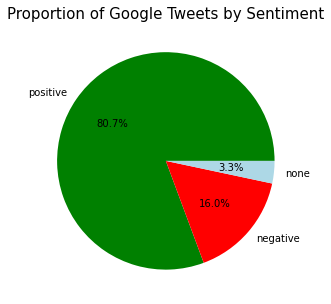

In [59]:
# Plot piechart for Google Products
sentiment_piechart(google_tweets, title='Proportion of Google Tweets by Sentiment')

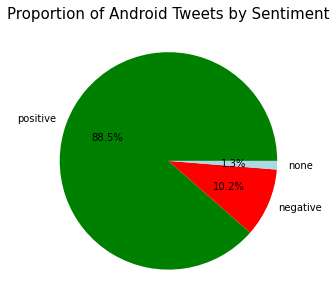

In [60]:
# Plot piechart for Android products
sentiment_piechart(android_tweets, title='Proportion of Android Tweets by Sentiment')

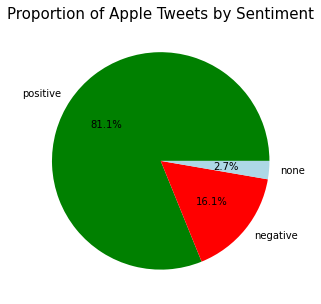

In [61]:
# Plot piechart for Apple products
sentiment_piechart(apple_tweets, title='Proportion of Apple Tweets by Sentiment')

Most of the attitudes towards Apple and Google appear to be good, with over 80% of tweets expressing positive emotions.

## Recommendations to Companies Based on Sentiment Analysis and Visualizations

Overall, the majority of contributors are happy with both companies. These are a few recommendations that Google/Android and Apple can implement to improve their public perception.

Google / Android
* Applications such as Google Maps garner lots of positive feedback from users, and launch party events with key guests like Marissa Mayer generate lots of excitement. Google should continue to focus on having a competitive advantage for its navigation apps and regularly hold launch events featuring individuals like Mayer.

* Google's Circles app is often mentioned in negative tweets about the company but also in positive tweets. Looking at negative tweets that mention Circles, it appears that consumers express impatience about the launch of the app, indicating that Google can benefit from easing uncertainty surrounding their product launches and with timed and informed releases.

* The Android OS seems to have some issues with faulty design and download failures, so Google should either divest away from Android to focus on more profitable lines of business or dedicate funds towards developing the OS during times of strong earnings.

Apple
* Apple's popup stores and new openings are received well by consumers, especially with the launch of the iPad 2. Since Apple regularly launches new hardware, the company can benefit from having popup stores in new areas whenever they develop products.
* The iPad 2 received considerable criticism surrounding its design. Additionally, products are perceived to have poor battery quality. Though there's lots of enthusiasm when it comes to product development, Apple should invest more in their product testing procedures to address the negative sentiment.
* There's negative perception on Apple as an overall company, hence, Apple should implement stronger corporate social responsibility policies and frame its values to align with the public.

## Modeling with Multinomial Naïve Bayes Classifier

### Binary Classifier Baseline Model
We'll start our modeling process by creating a binary classifier with the Multinomial Naïve Bayes algorithm. The binary classifier will determine whether a tweet should be labeled as "positive" or "negative".

In [62]:
# Import the relevant libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline

To prepare the data, we need to assign numerical values to represent "positive" and "negative" labels. We'll set "positive" equal to 1 and "negative" equal to 0, then we'll map the values onto the `sentiment` column. Once the values have been mapped, we will set the `sentiment` column as our y variable and the `tweet` column as our X variable.

In [63]:
# Filter out the tweets with no sentiment
model_df = data.loc[data['sentiment']!='none']

# Create a dictionary called "sentiment_dict" and map the values on the "sentiment" column.
sentiment_dict = {'positive': 1, 'negative': 0}
model_df['sentiment'] = model_df['sentiment'].map(sentiment_dict)

# Set our X and y variables
X = model_df['tweet']
y = model_df['sentiment']

Now that we've prepared the data, we'll pass the X and y variables into a train_test_split() and set the test_size equal to 0.3.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now that we have our testing and training values, we can create a baseline MultinomialNB() model. We'll define a pipeline called clf_pipe so that we can call a TfidfVectorizer() and MultinomialNB() method. We use the TfidfVectorizer() to determine how relevant each word is in the tweet.

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       159
           1       0.85      1.00      0.92       903

    accuracy                           0.85      1062
   macro avg       0.93      0.51      0.49      1062
weighted avg       0.88      0.85      0.79      1062

Test score: 0.85


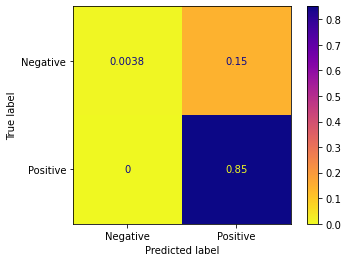

In [65]:
# Define "clf_pipe" without setting any parameters to TfidfVectorizer() nor MultinomialNB()
clf_pipe = Pipeline([('vect', TfidfVectorizer()), ('mnb', MultinomialNB())])

# Fit "clf_pipe" onto the training set
clf_pipe.fit(X_train, y_train)

# Generate y_pred using the predict() method
y_pred = clf_pipe.predict(X_test)

# Plot a confusion matrix and set normalize='all' to view the values as a proportion
plot_confusion_matrix(clf_pipe, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all', 
                      display_labels=['Negative', 'Positive'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print('Test score:', round(clf_pipe.score(X_test, y_test), 2))

There seems to be a high degree of accuracy for the baseline model. The model correctly predicts 85% of positive tweets and the model doesn't incorrectly label any positive tweets as negative. However, there's likely a class imbalance issue; recall that in our sentiment analysis, we saw that over 80% of the tweets in the dataset are positive. To confirm this, we can check by printing out the value counts for y_train below:

In [66]:
y_train.value_counts(normalize=True)

1    0.834477
0    0.165523
Name: sentiment, dtype: float64

Since this is only a baseline model, we will work towards trying to address the class imbalance problem in the next few runs. In the cell below, we implement stopwords and a tokenization parameter to see if we can improve currrent results.

### Binary Classifier with Custom Stopword Removal and Tokenizer
To improve our baseline results, we will experiment with our list of custom stopwords and tokenizer. For our sentiment analysis, we already created a list of stopwords called "stopwords_list". We'll set "stopwords_list" and "tk.tokenize" as parameters within TfidfVectorizer() for this iteration.

              precision    recall  f1-score   support

           0       1.00      0.06      0.12       159
           1       0.86      1.00      0.92       903

    accuracy                           0.86      1062
   macro avg       0.93      0.53      0.52      1062
weighted avg       0.88      0.86      0.80      1062

Test score: 0.86


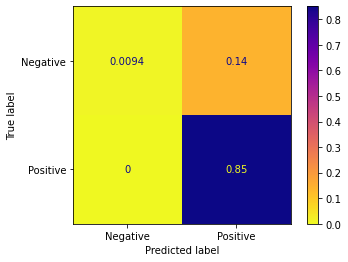

In [67]:
# Define "clf_pipe_tk_stop" to include the stopword removal process
clf_pipe_tk_stop = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words=stopwords_list)),
                     ('mnb', MultinomialNB())])

# Fit "clf_pipe_tk_stop" onto the training set
clf_pipe_tk_stop.fit(X_train, y_train)

# Generate y_pred using the predict() method
y_pred = clf_pipe_tk_stop.predict(X_test)

# Plot a confusion matrix 
plot_confusion_matrix(clf_pipe_tk_stop, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all',
                     display_labels=['Negative', 'Positive'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print("Test score:", round(clf_pipe_tk_stop.score(X_test, y_test), 2))

There seems to be an improvement in the model's f1-score, which is a stronger measure of the test's overall accuracy. Moreover, our test score improves slightly from 0.85 to 0.86. Hence, we'll keep the stopword removal process.

### Binary Classifier with Hyperparameter Tuning
Aside from including custom stopwords, there are other parameters we can define in our model. We'll use GridSearchCV() to find the best parameters that maximize accuracy. Since the dataset is imbalanced, we will set the grid search parameter to search for the values that will maximize "f1_weighted". The f1-score is the mean of precision and recall (number of true positives divided by total elements), and specifying "f1_weighted" addresses the imbalance.

In [68]:
# Define "param_grid" to search for the best alpha and ngram_range values
param_grid = {'vect__ngram_range': [(1,1), (1,2), (1,3)],
              'mnb__alpha': [0.00001, 0.0001, 0.001, 0.1, 1]}
gs = GridSearchCV(estimator = clf_pipe_tk_stop, param_grid = param_grid, scoring = 'f1_weighted')

# Fit the gridsearch onto the training set
gs.fit(X_train, y_train)

# Return the best parameters
gs.best_params_

{'mnb__alpha': 0.001, 'vect__ngram_range': (1, 3)}

Based on the cell we just run, the ideal alpha and ngram_range is 0.1 and (1, 3), respectively. We'll adjust our model accordingly.

              precision    recall  f1-score   support

           0       0.68      0.40      0.50       159
           1       0.90      0.97      0.93       903

    accuracy                           0.88      1062
   macro avg       0.79      0.68      0.72      1062
weighted avg       0.87      0.88      0.87      1062

Test score: 0.88


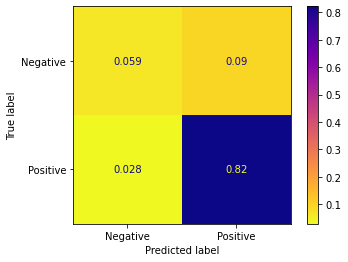

In [69]:
# Define "clf_pipe_tuned_mnb" with the best parameters we identified
clf_pipe_tuned_mnb = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, 
                                                        stop_words = stopwords_list,
                                                        ngram_range = (1,3))),
                                ('mnb', MultinomialNB(alpha = 0.001))])

# Fit "clf_pipe_tuned_mnb" onto the training set
clf_pipe_tuned_mnb.fit(X_train, y_train)

# Generate y_pred using the predict() method
y_pred = clf_pipe_tuned_mnb.predict(X_test)

# Plot a confusion matrix
plot_confusion_matrix(clf_pipe_tuned_mnb, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all',
                     display_labels=['Negative', 'Positive'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print("Test score:", round(clf_pipe_tuned_mnb.score(X_test, y_test), 2))

All of our metrics have improved significantly, especially our recall and f1-score. Moreover, our overall test score has gone from 0.86 to 0.89. So far, our best modeling process is when we remove stopwords, tokenize tweets, and conduct hyperparameter tuning to set alpha as 0.1 and ngram_range to (1, 3).

### Binary Classifier with Random Oversampling
As previously mentioned, there's a class imbalance in our dataset. Around 84% of the tweets are positive. Hence, in our final run, we'll include a RandomOverSampler() method in our pipeline to see if we can generate better performance metrics. The RandomOverSampler() method randomly selects data points from the minority class and adds them to the training set.

              precision    recall  f1-score   support

           0       0.65      0.44      0.53       159
           1       0.91      0.96      0.93       903

    accuracy                           0.88      1062
   macro avg       0.78      0.70      0.73      1062
weighted avg       0.87      0.88      0.87      1062

Test score: 0.88


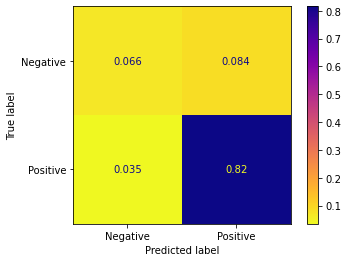

In [70]:
# Import the relevant library
from imblearn.over_sampling import RandomOverSampler

# Define "clf_pipe_tuned_mnb_os" with RandomOverSampler()
clf_pipe_tuned_mnb_os = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list,
                                                        ngram_range = (1, 3))),
                                  ('os', RandomOverSampler(random_state = 42)),
                                  ('mnb', MultinomialNB(alpha = 0.001))])

# Fit "clf_pipe_tuned_mnb_os" onto the training set
clf_pipe_tuned_mnb_os.fit(X_train, y_train)

# Generate y_pred using the predict() method
y_pred = clf_pipe_tuned_mnb_os.predict(X_test)

# Plot a confusion matrix
plot_confusion_matrix(clf_pipe_tuned_mnb_os, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all',
                     display_labels = ['Negative', 'Positive'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print("Test score:", round(clf_pipe_tuned_mnb_os.score(X_test, y_test), 2))

Our model returns better performance metrics with RandomOverSampling(), especially for tweets labeled as "negative".

### Best Model for Binary Classifier
After running the Multinomial Naïve Bayes algorithm several times, we found that the best model incorporates a stopword removal process and has tuned hyperparameters as follows:

`Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list, ngram_range = (1,3))), ('mnb', MultinomialNB(alpha = 0.001))])`

### Multiclass Classifier Baseline Model
Now that we've iterated through several runs of a binary classifier, we'll extend into a multiclass model. Again, we start with a baseline model and include tweets labeled as "none".

To prepare the data, we create a copy of the original dataset and map numeric values to the `sentiment` column. We set "positive" equal to 1, "negative" equal to 0, and "none" equal to 2.

We define our X and y variables, and then pass them into a train_test_split() method. Test size is set to 0.3.

After obtaining our training and test sets, we perform the same iterative modeling process we did for the binary classifier. At the end, we will identify the best model to use for our multiclass classifier.

In [71]:
# Create a copy of the original dataset and store it in "multi_model_df"
multi_model_df = data.copy()

# Set numeric values for each sentiment and map it onto the "sentiment" column
sentiment_dict_multi = {'negative': 0, 'positive': 1, 'none': 2}
multi_model_df['sentiment'] = multi_model_df['sentiment'].map(sentiment_dict_multi)

# Set X and y variables
X = multi_model_df['tweet']
y = multi_model_df['sentiment']

# Pass X and y variables into train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       190
           1       0.74      0.18      0.29       889
           2       0.63      0.97      0.76      1596

    accuracy                           0.64      2675
   macro avg       0.79      0.39      0.36      2675
weighted avg       0.69      0.64      0.56      2675

Test score: 0.64


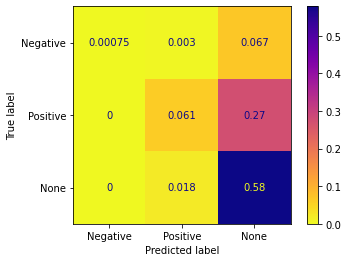

In [72]:
# Define "clf_pipe" without setting hyperparameters for TfidfVectorizer() nor MultinomialNB()
clf_pipe = Pipeline([('vect', TfidfVectorizer()),
                    ('mnb_multi', MultinomialNB())])

# Fit "clf_pipe" onto the training set
clf_pipe.fit(X_train, y_train)

# Generate y_pred using the predict() method
y_pred = clf_pipe.predict(X_test)

# Plot a confusion matrix
plot_confusion_matrix(clf_pipe, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all',
                     display_labels=['Negative', 'Positive', 'None'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print("Test score:", round(clf_pipe.score(X_test, y_test), 2))

### Multiclass Classifier with Custom Stopword Removal and Tokenization

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.71      0.22      0.34       889
           2       0.64      0.96      0.77      1596

    accuracy                           0.65      2675
   macro avg       0.45      0.39      0.37      2675
weighted avg       0.62      0.65      0.57      2675

Test score: 0.65


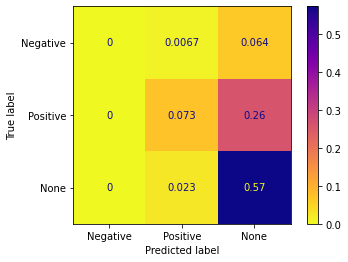

In [73]:
# Define "clf_pipe_tk_stop" with processes to remove stopwords
clf_pipe_tk_stop = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list)),
                            ('mnb_multi', MultinomialNB())])

# Fit "clf_pipe_tk_stop" onto training set
clf_pipe_tk_stop.fit(X_train, y_train)

# Generate y_pred using the predict() method
y_pred = clf_pipe_tk_stop.predict(X_test)
plot_confusion_matrix(clf_pipe_tk_stop, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all',
                     display_labels=['Negative', 'Positive', 'None'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print("Test score:", round(clf_pipe_tk_stop.score(X_test, y_test), 2))

### Multiclass Classifier with Hyperparameter Tuning

In [74]:
# Define a "param_grid" to scan for the best parameters
param_grid = {'vect__ngram_range': [(1,1), (1,2), (1,3)],
              'mnb_multi__alpha': [0.00001, 0.0001, 0.001, 0.1, 1]}
gs = GridSearchCV(estimator = clf_pipe_tk_stop, param_grid = param_grid, scoring = 'f1_weighted')

# Fit the gridsearch onto the training set
gs.fit(X_train, y_train)

# Return the best parameters
gs.best_params_

{'mnb_multi__alpha': 0.1, 'vect__ngram_range': (1, 2)}

              precision    recall  f1-score   support

           0       0.77      0.17      0.28       190
           1       0.61      0.52      0.56       889
           2       0.71      0.84      0.77      1596

    accuracy                           0.69      2675
   macro avg       0.70      0.51      0.54      2675
weighted avg       0.68      0.69      0.67      2675

Test score: 0.69


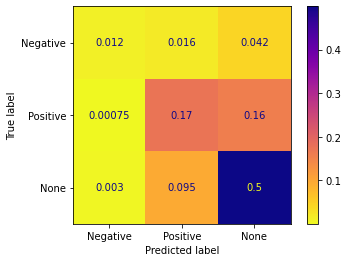

In [75]:
# Define "clf_pipe_tuned_multi" using the best parameters we retrieved
clf_pipe_tuned_multi = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list,
                                                          ngram_range = (1, 2))),
                                 ('mnb_multi', MultinomialNB(alpha = 0.1))])

# Fit "clf_pipe_tuned_multi" onto the training set
clf_pipe_tuned_multi.fit(X_train, y_train)
y_pred = clf_pipe_tuned_multi.predict(X_test)

# Plot a confusion matrix
plot_confusion_matrix(clf_pipe_tuned_multi, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all',
                     display_labels=['Negative', 'Positive', 'None'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print("Test score:", round(clf_pipe_tuned_multi.score(X_test, y_test), 2))

### Multiclass Classifier with Random Oversampling

              precision    recall  f1-score   support

           0       0.42      0.41      0.42       190
           1       0.55      0.62      0.58       889
           2       0.75      0.70      0.73      1596

    accuracy                           0.65      2675
   macro avg       0.57      0.58      0.57      2675
weighted avg       0.66      0.65      0.66      2675

Test score: 0.65


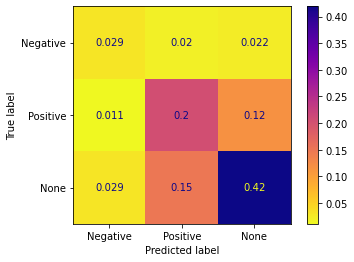

In [76]:
# Define "clf_pipe_tuned_multi_os" to handle the class imbalance with RandomOverSampler()
clf_pipe_tuned_multi_os = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list,
                                                             ngram_range = (1, 2))),
                                    ('os', RandomOverSampler(random_state = 42)),
                                    ('mnb_multi', MultinomialNB(alpha = 0.1))])

# Fit "clf_pipe_tuned_multi_os" onto the training set
clf_pipe_tuned_multi_os.fit(X_train, y_train)

# Generate "y_pred" using the predict() method
y_pred = clf_pipe_tuned_multi_os.predict(X_test)

# Plot a confusion matrix
plot_confusion_matrix(clf_pipe_tuned_multi_os, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all',
                     display_labels=['Negative', 'Positive', 'None'])

# Print the classification report and test score
print(classification_report(y_test, y_pred))
print("Test score:", round(clf_pipe_tuned_multi_os.score(X_test, y_test), 2))

### Best Model for Multiclass Classifier
Similar to the binary classifier, the best model for our multiclass problem is the Multinomial Naïve Bayes algorithm that tokenizes, removes stopwords, and has tuned hyperparameters. This version of our multiclass classifier returns a test score of 0.69, which is lower than our binary classifier. However, this is expected, given the addition of the "none" labeled tweets. To reiterate, the model is as follows:

`Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list, ngram_range = (1, 2))), ('mnb_multi', MultinomialNB(alpha = 0.1))])`

## Conclusion and Recommendations
The optimal MNB model for a binary classifier has the following parameters:

`Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list, ngram_range = (1,3))), ('mnb', MultinomialNB(alpha = 0.001))])`

The optimal MNB model for a multiclass classifier has the following parameters:

`Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list, ngram_range = (1, 2))), ('mnb_multi', MultinomialNB(alpha = 0.1))])`

By building an NLP tool and conducting a sentiment analysis, we recommend the following: 

Google
* Google Maps garners lots of positive attention, and continued investment in the app is key to success
* Launches and party events with popular figures like Marissa Mayer garner excitement from contributors
* Pain points addressed by customers include problems with Android compatibility and uncertainty surrounding product launches

Apple
* Frequently have popup stores and booths as consumers enjoy visiting new locations
* Concentrate marketing efforts on product launches, as they garner enthusiasm (shown through iPad 2's launch)
* Increase product testing to address design headaches
* Work towards improved corporate social responsibility efforts to ease negative perspectives on the company as a whole

## Future Analyses
* Gather more data from different sources such as Google Reviews, stores like Best Buy, or tech articles
* Find more negative sentiment data to improve the analysis on what consumers dislike about each brand
* Add processes such as stemming to tokenization and stopword removal to see if better models can be built

## Contact Information
* [E-mail](kezia.setokusumo@stern.nyu.edu)
* [Github](https://github.com/keziasetokusumo)
* [LinkedIn](https://www.linkedin.com/in/keziasetokusumo/)